# Master project XENON100 LEC MAP
Cesium source

In [1]:
# Boilerplate startup code
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
import scipy
from scipy.stats import norm


In [2]:
%matplotlib inline 
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [3]:
# Import the XENON100 configuration from pax
from pax.configuration import load_configuration
pax_config = load_configuration('XENON100')

In [4]:
import hax
hax.init(main_data_paths=['/home/xenon100ws/newcs']) #Folder containing the data

In [5]:
from pax import units

In [6]:
from IPython.core.display import Image

In [7]:
hax.ipython.code_hider()

In [8]:
# Usefull minitree :
class AreaPerChannel(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.area_per_channel*', 'peaks.n_saturated_per_channel*']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 
        s1 = event.peaks[event.interactions[0].s1]
        
        # Get the main interaction
        interaction = event.interactions[0]
        
        temp_dict = {}
        for channel, s1_area in enumerate(s1.area_per_channel):
            if (channel >=141) & (channel <=209): 
                temp_dict['s1_area_channel_%d' % channel] = s1_area
        return temp_dict

In [9]:
class R2 (hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
            
        # Get the main interaction
        interaction = event.interactions[0]
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(r2= interaction.x**2+interaction.y**2)

In [10]:
class Photopeak (hax.minitrees.TreeMaker):
    extra_branches = ['area']
    __version__ = '0.0.1' 
    
    # Cut data not in the photopeak, using cS1 and cS2_tot_bottom values determined in a other note
    # "MasterProjectCs137"
    
    def extract_data(self, event):
       
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main interaction
        interaction = event.interactions[0]
            
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        event_data=dict()
        if len(event.interactions) !=0:
            if (s1.area * interaction.s1_area_correction >750) &(s1.area * interaction.s1_area_correction <1600):
                event_data['newcs1']=s1.area * interaction.s1_area_correction
            
            if ((1-s2.area_fraction_top)*interaction.s2_area_correction*s2.area) > 2.5e5:
                event_data['newcs2']=((1-s2.area_fraction_top)*interaction.s2_area_correction*s2.area)
              
        return event_data
       

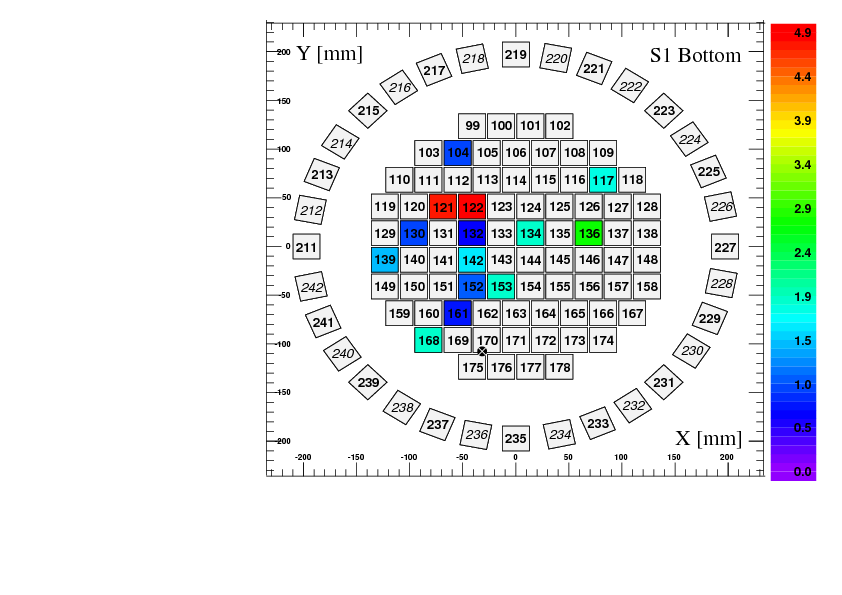

In [11]:
Image('https://inspirehep.net/record/1122618/files/fig10_s1.png')


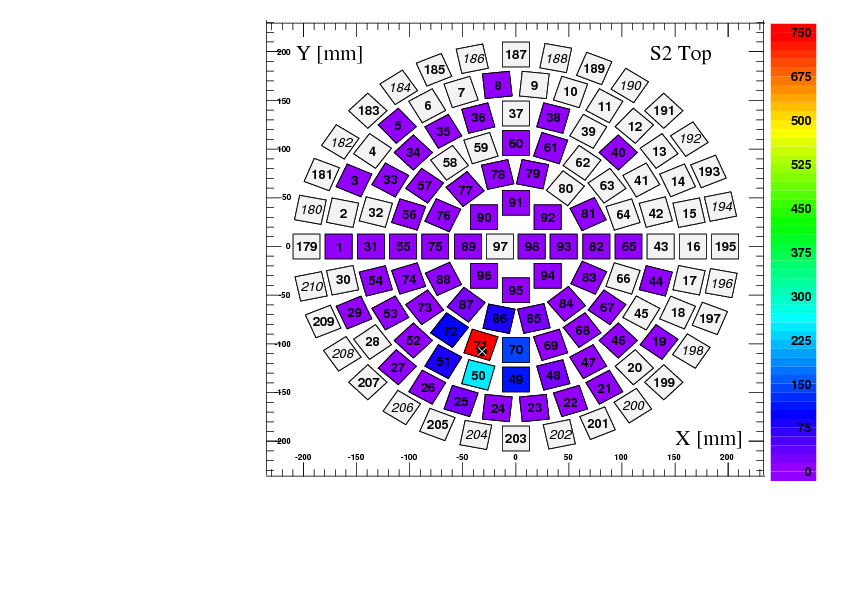

In [12]:
Image('https://inspirehep.net/record/1122618/files/fig10_s2.png')

# Cesium data :

In [13]:
dataset=['test_data','pax_v410_xe100_110912_1809','pax_v410_xe100_110927_1949','pax_v410_xe100_110718_1511','pax_v410_xe100_110829_1516','pax_v410_xe100_110905_1435','pax_v410_xe100_110919_1747']


In [14]:
# use hax on our data
data = hax.minitrees.load(dataset, treemakers=[Photopeak,AreaPerChannel,'Basics'], force_reload=True)
print(len(data))

Found minitree at ./test_data_Photopeak.root
Don't know a dataset named test_data, trying to find it anyway...


100%|██████████| 73000/73000 [00:08<00:00, 8181.97it/s] 


Created minitree Photopeak for dataset test_data
Found minitree at ./pax_v410_xe100_110912_1809_Photopeak.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:06<00:00, 7251.29it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110912_1809
Found minitree at ./pax_v410_xe100_110927_1949_Photopeak.root


  0%|          | 175/50000 [00:01<1:04:01, 12.97it/s]

Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:04<00:00, 10502.87it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110927_1949
Found minitree at ./pax_v410_xe100_110718_1511_Photopeak.root
Don't know a dataset named pax_v410_xe100_110718_1511, trying to find it anyway...


100%|██████████| 50000/50000 [00:07<00:00, 7041.05it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110718_1511


  0%|          | 1/50000 [00:00<1:25:23,  9.76it/s]

Found minitree at ./pax_v410_xe100_110829_1516_Photopeak.root
Don't know a dataset named pax_v410_xe100_110829_1516, trying to find it anyway...


100%|██████████| 50000/50000 [00:07<00:00, 7003.16it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110829_1516
Found minitree at ./pax_v410_xe100_110905_1435_Photopeak.root


  0%|          | 1/50000 [00:00<1:25:09,  9.79it/s]

Don't know a dataset named pax_v410_xe100_110905_1435, trying to find it anyway...


100%|██████████| 50000/50000 [00:07<00:00, 7125.69it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110905_1435


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110919_1747_Photopeak.root
Don't know a dataset named pax_v410_xe100_110919_1747, trying to find it anyway...


100%|██████████| 50000/50000 [00:06<00:00, 9394.18it/s]


Created minitree Photopeak for dataset pax_v410_xe100_110919_1747


  0%|          | 0/73000 [00:00<?, ?it/s]

Found minitree at ./test_data_AreaPerChannel.root
Don't know a dataset named test_data, trying to find it anyway...


100%|██████████| 73000/73000 [00:28<00:00, 2521.37it/s]


Created minitree AreaPerChannel for dataset test_data


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110912_1809_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 1973.36it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110912_1809
Found minitree at ./pax_v410_xe100_110927_1949_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:15<00:00, 3243.83it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110927_1949


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110718_1511_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110718_1511, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 2521.94it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110718_1511


  0%|          | 1/50000 [00:00<1:46:25,  7.83it/s]

Found minitree at ./pax_v410_xe100_110829_1516_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110829_1516, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 1872.14it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110829_1516


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110905_1435_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110905_1435, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 1883.11it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110905_1435
Found minitree at ./pax_v410_xe100_110919_1747_AreaPerChannel.root
Don't know a dataset named pax_v410_xe100_110919_1747, trying to find it anyway...


100%|██████████| 50000/50000 [00:26<00:00, 2430.59it/s]


Created minitree AreaPerChannel for dataset pax_v410_xe100_110919_1747
Found minitree at ./test_data_Basics.root
Don't know a dataset named test_data, trying to find it anyway...


100%|██████████| 73000/73000 [00:35<00:00, 2046.86it/s]


Created minitree Basics for dataset test_data


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110912_1809_Basics.root
Don't know a dataset named pax_v410_xe100_110912_1809, trying to find it anyway...


100%|██████████| 50000/50000 [00:21<00:00, 2315.77it/s]


Created minitree Basics for dataset pax_v410_xe100_110912_1809


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110927_1949_Basics.root
Don't know a dataset named pax_v410_xe100_110927_1949, trying to find it anyway...


100%|██████████| 50000/50000 [00:16<00:00, 3087.66it/s]


Created minitree Basics for dataset pax_v410_xe100_110927_1949


  0%|          | 21/50000 [00:00<03:58, 209.88it/s]

Found minitree at ./pax_v410_xe100_110718_1511_Basics.root
Don't know a dataset named pax_v410_xe100_110718_1511, trying to find it anyway...


100%|██████████| 50000/50000 [00:21<00:00, 2329.34it/s]


Created minitree Basics for dataset pax_v410_xe100_110718_1511


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110829_1516_Basics.root
Don't know a dataset named pax_v410_xe100_110829_1516, trying to find it anyway...


100%|██████████| 50000/50000 [00:22<00:00, 2239.83it/s]


Created minitree Basics for dataset pax_v410_xe100_110829_1516


  0%|          | 1/50000 [00:00<1:25:39,  9.73it/s]

Found minitree at ./pax_v410_xe100_110905_1435_Basics.root
Don't know a dataset named pax_v410_xe100_110905_1435, trying to find it anyway...


100%|██████████| 50000/50000 [00:22<00:00, 2260.28it/s]


Created minitree Basics for dataset pax_v410_xe100_110905_1435


  0%|          | 0/50000 [00:00<?, ?it/s]

Found minitree at ./pax_v410_xe100_110919_1747_Basics.root
Don't know a dataset named pax_v410_xe100_110919_1747, trying to find it anyway...


100%|██████████| 50000/50000 [00:21<00:00, 2276.40it/s]


Created minitree Basics for dataset pax_v410_xe100_110919_1747
373000


In [15]:
# cut data with newcs1 == nan
data= data[(data['newcs1']>0)&(data['newcs2']>0)]
print('Number of events =',len(data))

Number of events = 73583


In [16]:
data['r']=np.sqrt(data['x']**2+data['y']**2)
data['phi']=np.arctan(data['y']/data['x'])

In [17]:
data.head(5)

index       newcs1         newcs2  index  s1_area_channel_141  \
4       4  1158.293602  300753.909481      4            11.940523   
22     22  1098.850509  252778.134836     22            16.471821   
29     29  1147.021603  256758.503109     29            10.053741   
39     39  1113.680358  410072.850779     39            11.704188   
42     42  1180.467104  276985.478157     42            10.017682   

    s1_area_channel_142  s1_area_channel_143  s1_area_channel_144  \
4             11.133772            10.608856            19.019485   
22             7.477228             8.342658            13.643671   
29            20.935892            19.071497            19.783900   
39            18.369215            20.235432            19.550009   
42            16.619992             9.883359            16.682646   

    s1_area_channel_145  s1_area_channel_146    ...     largest_veto  \
4             17.884325             3.942174    ...         3.403345   
22            22.819755            14.407629    ...         0.000000   
29             9.631557            20.797033    ...         4.594101   
39             7.380330             2.949053    ...        37.444862   
42            19.614940            33.716453    ...         0.000000   

             s1  s1_area_fraction_top            s2  s2_area_fraction_top  \
4    849.740295              0.255484  344215.21875              0.366078   
22  1073.199097              0.160233  270263.31250              0.366614   
29  1247.790649              0.145457  318191.28125              0.349450   
39  1063.908569              0.154182  326882.21875              0.373772   
42  1143.417236              0.120380  272065.09375              0.373556   

            x          y          z          r       phi  
4    6.929379  -0.901130  -6.002091   6.987727 -0.129319  
22   2.641243   9.601695 -15.863226   9.958349  1.302355  
29   3.449152   7.612994 -18.272846   8.357890  1.145400  
39  -0.652542 -13.144068 -17.921568  13.160256  1.521192  
42  11.838983   3.324859 -20.330551  12.296999  0.273787  

[5 rows x 94 columns]

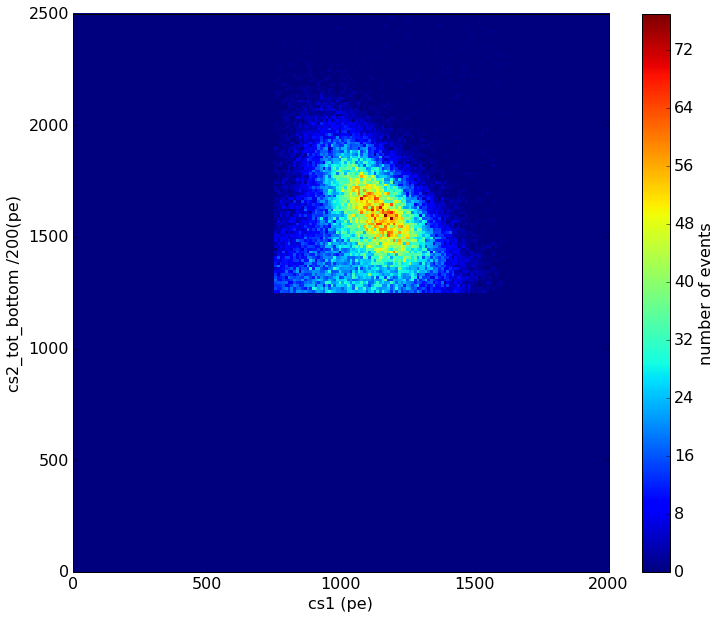

In [18]:
plt.hist2d(data['newcs1'],data['newcs2']/200, bins=200, range=[[0,2000],[0,2500]])
plt.colorbar(label='number of events')
plt.xlabel('cs1 (pe)')
plt.ylabel('cs2_tot_bottom /200(pe)')
plt.show()

In [19]:
new_cs2_tot_bottom = data['newcs2']
new_cs1 =data['newcs1']

# Combined Energy Scale (CES)
Erik's code

In [20]:
from recarray_tools import filter_on_fields, group_by, append_fields
from tqdm import tqdm
from scipy.optimize import curve_fit
from pax.formats import flat_data_formats
file_format = 'hdf5'
ioformat = flat_data_formats[file_format]()

In [21]:
# Some functions that'll be used
def func_poly_2(x,a,b,c):
    return a + b*x + c*x**2
def func_exp(x,a,tau):
    return a*np.exp(-x/tau)
def func_gauss(x,A,mu,sig):
    return A*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

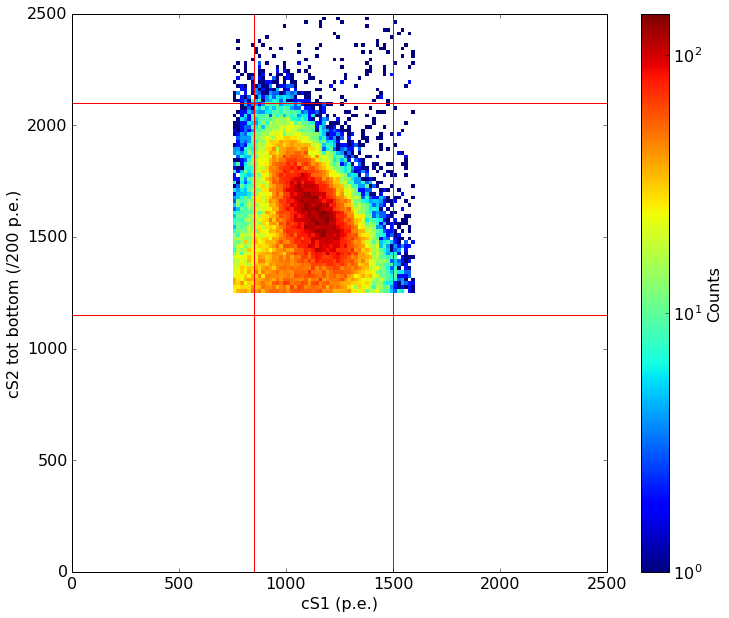

In [22]:
# We have to fit a Gaussian fonction to the ellipse in the red lines
from matplotlib.colors import LogNorm


plt.hist2d(np.array(new_cs1),np.array(new_cs2_tot_bottom)/200, bins=(150,150), range =([0,2500],[0,2500]),cmin=1,norm=LogNorm())
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
plt.axvline(850,color='red')
plt.axvline(1500,color='red')
plt.axhline(1150,color='red')
plt.axhline(2100,color='red')



plt.show()

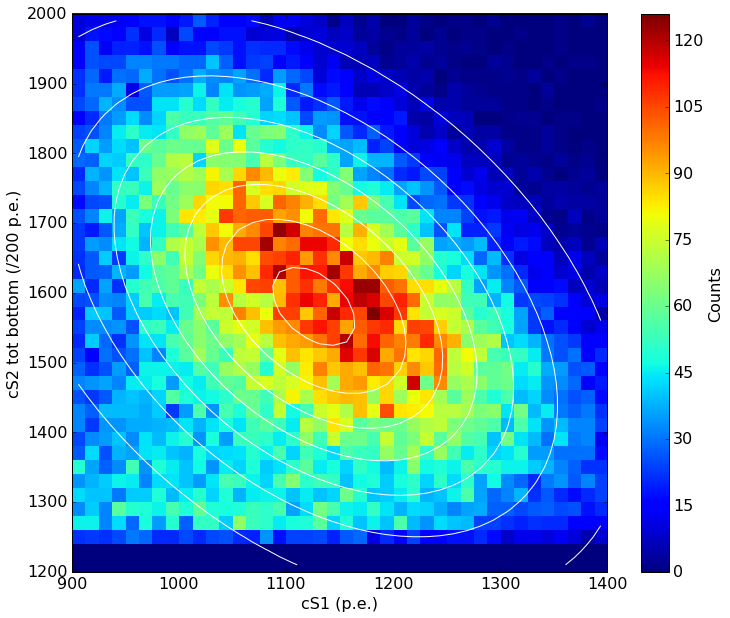

[  1.04717091e+02   1.12597198e+03   1.58059080e+03   1.14650310e+02
   2.09091023e+02  -4.22153085e-01   4.56394073e+00]


In [23]:
# Settings!
binsize = 40
range_s1 = (900,1400)
range_s2 = (1200,2000)

# This is the function to fit
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)    
    a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
    b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
    c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g.ravel()

s1s2hist = plt.hist2d(np.array(new_cs1),(np.array(new_cs2_tot_bottom)/200),
         bins=(binsize,binsize),range=(range_s1,range_s2))
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
hist_counts,hist_s1, hist_s2, _ = s1s2hist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_s1[i+1]+hist_s1[i])/2
           for i in range(len(hist_s1)-1)]
y_fit_1d =[(hist_s2[i+1]+hist_s2[i])/2
           for i in range(len(hist_s2)-1)]

x_flat = []
y_flat = []
z_flat = []

# Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
# Has been checked.

for i_y in range(len(y_fit_1d)):
    for i_x in range(len(x_fit_1d)):
        x_flat.append(x_fit_1d[i_x])
        y_flat.append(y_fit_1d[i_y])
        z_flat.append(hist_counts[i_x,i_y])
        
# twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):

initial_guess = (20,1140,1550,100,500,0.78,0)

popt, pcov = curve_fit(twoD_Gaussian, (x_flat, y_flat), z_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# For plotting purposes
data_fitted = np.array([twoD_Gaussian((x, y), *popt)
               for x in x_fit_1d
               for y in y_fit_1d]).flatten()


plt.contour(x_fit_1d, y_fit_1d, data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='w')


plt.show()

print(popt)

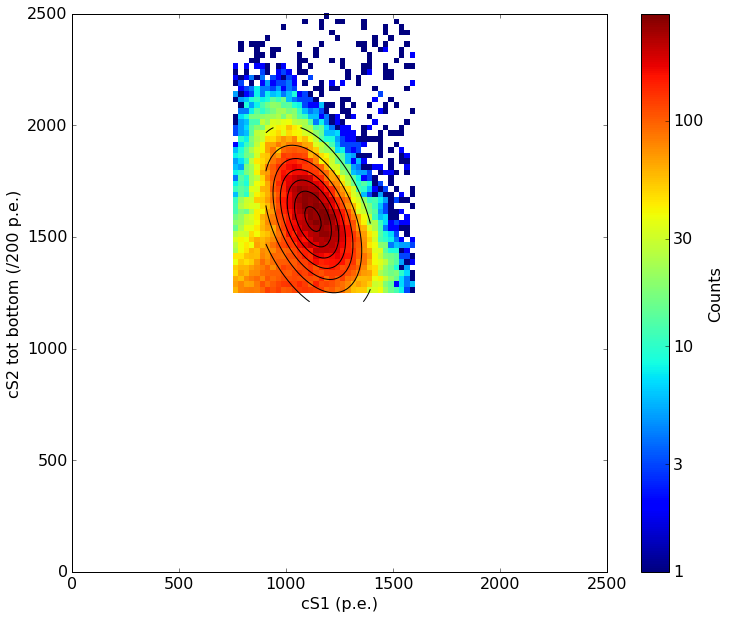

In [24]:

plt.hist2d(np.array(new_cs1),np.array(new_cs2_tot_bottom)/200,
           bins=(100,100),range=((0,2500),(0,2500)),cmin=1,norm=LogNorm())
cbar = plt.colorbar(label = 'Counts',ticks=[1,3,10,30,100])
cbar.set_ticklabels([1,3,10,30,100])
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 tot bottom (/200 p.e.)")
plt.contour(x_fit_1d, np.array(y_fit_1d), data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='black')




plt.show()

In [25]:
# We are moving to energy space!
mte1=popt[1]
mte2=popt[2]
energy_cs1= np.array(new_cs1)/popt[1]*662
energy_cs2=(np.array(new_cs2_tot_bottom)/200)/popt[2]*662
print(energy_cs1)
print(energy_cs2)

[ 681.00306018  646.05429742  674.37584082 ...,  798.50440387  838.26850409
  705.70648143]
[ 629.82490042  529.35625634  537.69175913 ...,  625.91654613  580.9788481
  547.24400372]


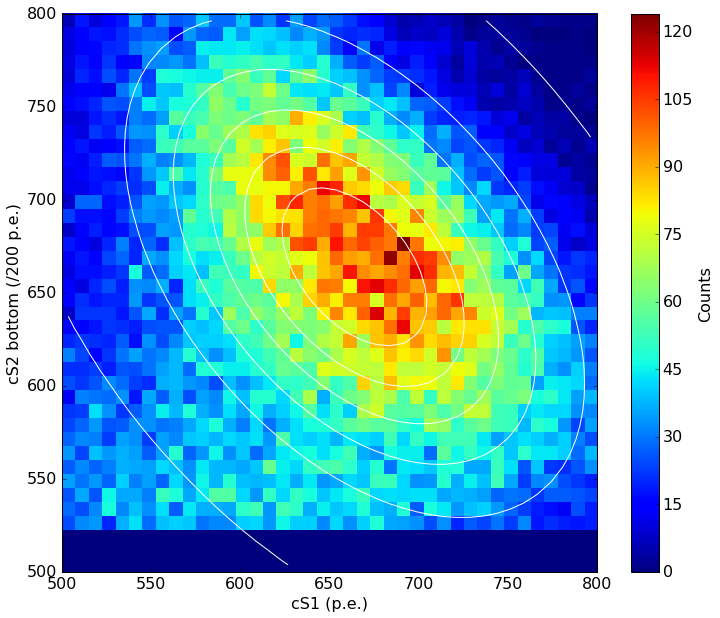

[  9.08730848e+01   6.64064427e+02   6.63926354e+02   7.00276376e+01
   7.32369845e+01  -4.68012360e-01   1.32256035e+01]


In [26]:
# Settings:
binsize = 40
range_s1 = (500,800)
range_s2 = (500,800)

# Better function!
def bivar(xdata_tuple, amplitude, xo,yo,sigma_x,sigma_y,rho,offset):
    (x, y) = xdata_tuple 
    xo = float(xo)
    yo = float(yo)  
    return offset + amplitude*np.exp((-1/(2*(1-rho**2)))*((x-xo)**2/(sigma_x**2) + 
                                                          (y-yo)**2/(sigma_y**2) -
                                                          2*rho*(x-xo)*(y-yo)/(sigma_x*sigma_y)) 
                                    )

s1s2hist = plt.hist2d(np.array(energy_cs1),np.array(energy_cs2), bins=(binsize,binsize),range=(range_s1,range_s2))
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 (p.e.)")
plt.ylabel("cS2 bottom (/200 p.e.)")

# hist_counts: binsize x binsize array of number of counts
# s1 / s2: binsize+1 array of edges

hist_counts,hist_s1, hist_s2, _ = s1s2hist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_s1[i+1]+hist_s1[i])/2
           for i in range(len(hist_s1)-1)]
y_fit_1d =[(hist_s2[i+1]+hist_s2[i])/2
           for i in range(len(hist_s2)-1)]

x_flat = []
y_flat = []
z_flat = []

# Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
# Has been checked.
for i_y in range(len(y_fit_1d)):
    for i_x in range(len(x_fit_1d)):
        x_flat.append(x_fit_1d[i_x])
        y_flat.append(y_fit_1d[i_y])
        z_flat.append(hist_counts[i_x,i_y])
        
# twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, theta, offset):
initial_guess = (20,662,662,100,100,0.78,0)
popt, pcov = curve_fit(bivar, (x_flat, y_flat), z_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

# For plotting purposes
data_fitted = np.array([bivar((x, y), *popt)
               for x in x_fit_1d
               for y in y_fit_1d]).flatten()


plt.contour(x_fit_1d, y_fit_1d, data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='w')



plt.show()
print(popt)


anticorrelation angle= -0.833141814293 rad


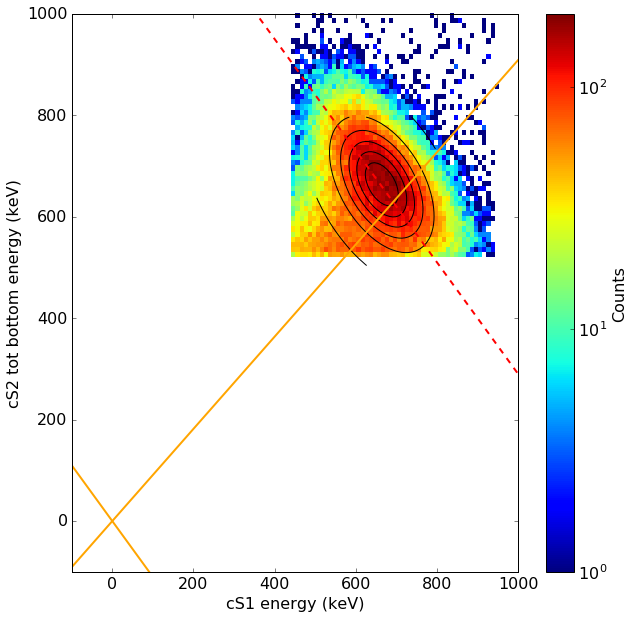

In [27]:
binsize=40
plt.figure(figsize=(10,10))
plt.hist2d(np.array(energy_cs1),np.array(energy_cs2),
           bins=(100,100),range=((0,1000),(0,1000)),cmin=1,norm=LogNorm())
plt.colorbar(label = 'Counts')
plt.xlabel("cS1 energy (keV)")
plt.ylabel("cS2 tot bottom energy (keV)")
plt.contour(x_fit_1d, np.array(y_fit_1d), data_fitted.reshape(binsize,binsize,order ='F'), 8,colors='black')


sigma_x  = popt[3]
sigma_y  = popt[4]
rho = popt[5]


theta=0.5*np.arctan(2*rho*(sigma_x*sigma_y)/(sigma_x**2-sigma_y**2))

theta=theta-np.pi/2 # Angle definition

print('anticorrelation angle=', theta,'rad')


x_list = [x for x in np.arange(-2000,2000,1.)]
v_axis = [-x*np.cos(theta)/np.sin(theta) for x in x_list]
u_axis = [x*np.tan(theta) for x in x_list]

c = 662.*np.cos(theta)-662.*np.sin(theta)

u_axis_2 = [x*np.tan(theta) + c/np.cos(theta) for x in x_list]
v_axis_2 = [-x*np.cos(theta)/np.sin(theta) + c/np.sin(theta) for x in x_list]

plt.plot(x_list,u_axis,color='orange',lw=2)
plt.plot(x_list,v_axis,color='orange',lw=2)
plt.plot(x_list,u_axis_2,color='red',lw=2,ls='--')

plt.xlim(-100,1000)
plt.ylim(-100,1000)


plt.show()

Projection of the energy along the large axis of the ellipse

anticorrelation angle= -0.833141814293 rad


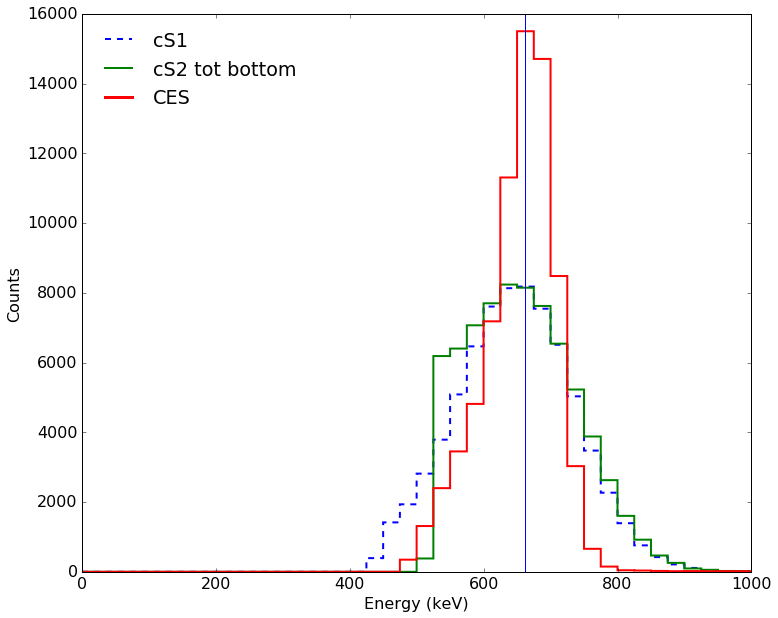

In [28]:
# http://2.bp.blogspot.com/-G-KLeae_EYU/TgdtpzntqvI/AAAAAAAABrI/Rv8Iea9zFVQ/s1600/Screen%2Bshot%2B2011-06-26%2Bat%2B1.33.51%2BPM.png

theta = 0.5*np.arctan(2*rho*(sigma_x*sigma_y)/(sigma_x**2-sigma_y**2))
theta=theta-np.pi/2 # Angle definition

print('anticorrelation angle=',theta,'rad')

# u = x cos(th) + y sin(th)
# v = y cos(th) - x sin(th)
peak_v = 662.*np.cos(theta)-662.*np.sin(theta)

# Parameters for plotting
myrange = (0,1000)
mybins = 40

# Produce histograms
plt.hist(np.array(energy_cs1),bins=mybins,histtype='step',label='cS1',range=myrange,linestyle='dashed',lw=2)
plt.hist(np.array(energy_cs2),bins=mybins,histtype='step',label='cS2 tot bottom',range=myrange,lw=2)
plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=mybins,
         histtype='step',label='CES',range=myrange,lw=2)

# Legend
p1,  = plt.plot(0,0,color='blue',linestyle='dashed',lw=2)
p2,  = plt.plot(0,0,color='green',lw=2)
p3,  = plt.plot(0,0,color='red',lw=3)
l1 = plt.legend([p1,p2,p3], ["cS1","cS2 tot bottom","CES"], loc='upper left',frameon=False)

plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.axvline(662)


plt.show()

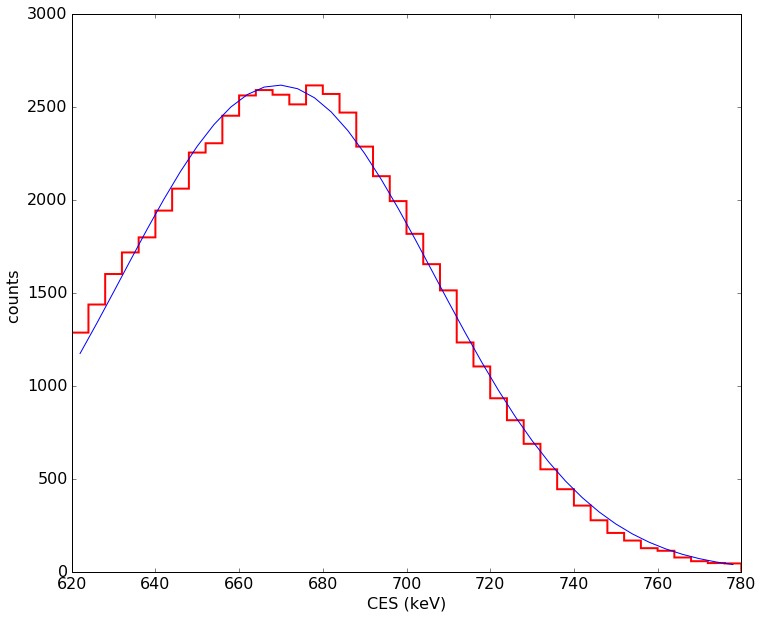

[ 2616.87215505   669.39674039   -37.42811807]
sigma_CES= -37.4281180692


In [29]:
# Fit an one dimentional Gaussian function to CES to determine the standard deviation
# Settings!
binsize = 40
myrange=(620,780)
mybins=40
# This is the function to fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# p is the initial guess

CEShist = plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=mybins,
         histtype='step',label='CES',range=myrange,lw=2, color='red')


plt.xlabel("CES (keV)")
plt.ylabel("counts ")

hist_counts,hist_energy,_=CEShist

# Transform bin EDGES to bin CENTERS (decreases size by one)
x_fit_1d =[(hist_energy[i+1]+hist_energy[i])/2
           for i in range(0,len(hist_energy)-1)]

x_flat = []
y_flat = []


#  Loop over all combinations of x and y coordinates and add x, y and z into one n x n list each
#  Has been checked.

for i_x in range(len(x_fit_1d)):
    x_flat.append(x_fit_1d[i_x])
    y_flat.append(hist_counts[i_x])
        
#  oneD_Gaussian:

initial_guess = (400,662,100)

popt, pcov = curve_fit(gauss,x_flat, y_flat, p0=initial_guess)
perr = np.sqrt(np.diag(pcov))

#  For plotting purposes
data_fitted = np.array([gauss(x, *popt)
               for x in x_fit_1d]).flatten()

plt.plot(x_fit_1d, data_fitted.reshape(binsize,order ='F'))

plt.show()

print(popt)
sigma_CES=popt[2]
print('sigma_CES=', popt[2])

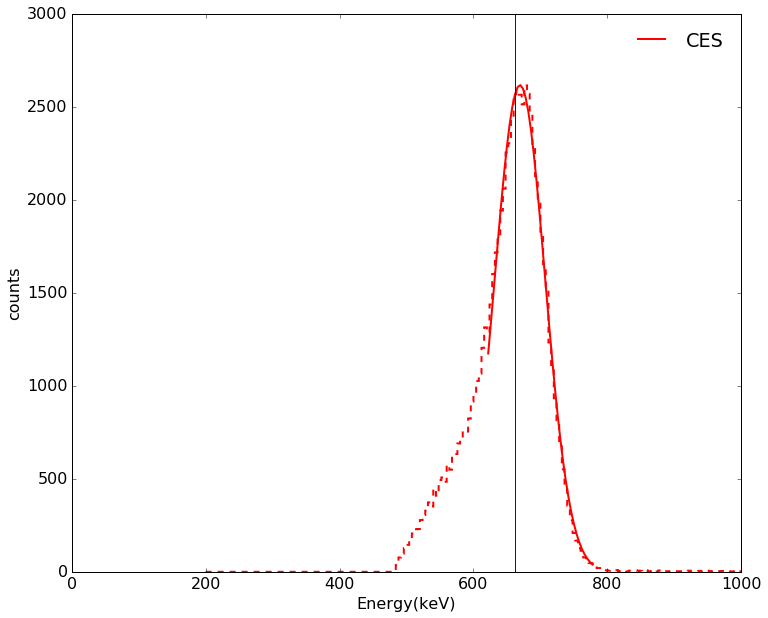

In [30]:
myrange=(200,1000)
binsize=40
plt.hist(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)),bins=200,
         histtype='step',label='CES',range=myrange,lw=2, linestyle ='dashed',color='red')

plt.xlabel("Energy(keV)")
plt.ylabel("counts")
         
plt.plot(x_fit_1d, data_fitted.reshape(binsize,order ='F'),color='red', lw=2)
# Legend
p1,  = plt.plot(0,0,color='red',lw=2)

l1 = plt.legend([p1], ["CES"], loc='upper right',frameon=False)
plt.axvline (662)
# plt.axvline(662+37.7)
# plt.axvline(662-37.7)
plt.show()

 # Select events in the photopeak (662- 2* $\sigma$ < CES <662 + 2* $\sigma$)

In [31]:
CES=np.array(662./peak_v*(-np.array(energy_cs1)*np.sin(theta)+np.array(energy_cs2)*np.cos(theta)))
dataE2s=data[(CES>662+2*sigma_CES) & (CES<662-2*sigma_CES)]
CESselect2s= CES[(CES>662+2*sigma_CES)&(CES<662-2*sigma_CES)] 
len(CESselect2s)

61761

In [32]:
dataE2s.head()

index       newcs1         newcs2  index  s1_area_channel_141  \
4       4  1158.293602  300753.909481      4            11.940523   
22     22  1098.850509  252778.134836     22            16.471821   
29     29  1147.021603  256758.503109     29            10.053741   
42     42  1180.467104  276985.478157     42            10.017682   
55     55  1136.810747  286751.131700     55            10.233063   

    s1_area_channel_142  s1_area_channel_143  s1_area_channel_144  \
4             11.133772            10.608856            19.019485   
22             7.477228             8.342658            13.643671   
29            20.935892            19.071497            19.783900   
42            16.619992             9.883359            16.682646   
55             6.224732            11.627468             8.429321   

    s1_area_channel_145  s1_area_channel_146    ...     largest_veto  \
4             17.884325             3.942174    ...         3.403345   
22            22.819755            14.407629    ...         0.000000   
29             9.631557            20.797033    ...         4.594101   
42            19.614940            33.716453    ...         0.000000   
55             9.958494            17.316477    ...         0.000000   

             s1  s1_area_fraction_top            s2  s2_area_fraction_top  \
4    849.740295              0.255484  344215.21875              0.366078   
22  1073.199097              0.160233  270263.31250              0.366614   
29  1247.790649              0.145457  318191.28125              0.349450   
42  1143.417236              0.120380  272065.09375              0.373556   
55   957.149719              0.178900  316809.31250              0.347038   

            x         y          z          r       phi  
4    6.929379 -0.901130  -6.002091   6.987727 -0.129319  
22   2.641243  9.601695 -15.863226   9.958349  1.302355  
29   3.449152  7.612994 -18.272846   8.357890  1.145400  
42  11.838983  3.324859 -20.330551  12.296999  0.273787  
55   5.872881  8.358757 -11.779012  10.215652  0.958326  

[5 rows x 94 columns]

# Find the S1 values in the middle of the TPC (z~-15 cm and r~0 cm$^2$)

In [33]:
# Values of S1 in the middle of the TPC
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)

number_list = []
s1_mean_values=[]

box_cut=[]

for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1'])/len(dataE2s[box_cut])))
            
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break
       

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(z_slices)-1,len(r_slices)-1)    
s1_mean_tpc=s1_mean_values[8][0] # In the middle of the TPC (z~15, r~0), values=1
print('values of S1 in the middle of the TPC= ',s1_mean_values[8][0], 'pe')

values of S1 in the middle of the TPC=  1235.17318672 pe


# Per PMT 

# PMT 141

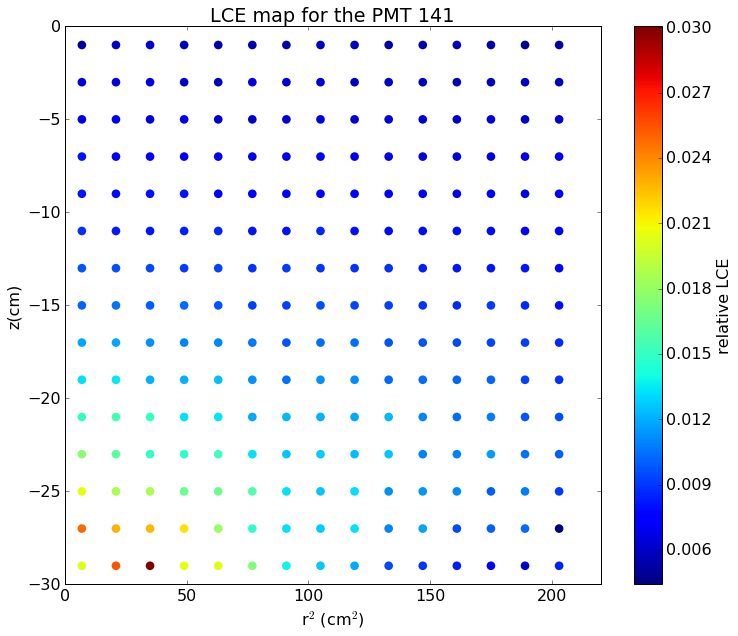

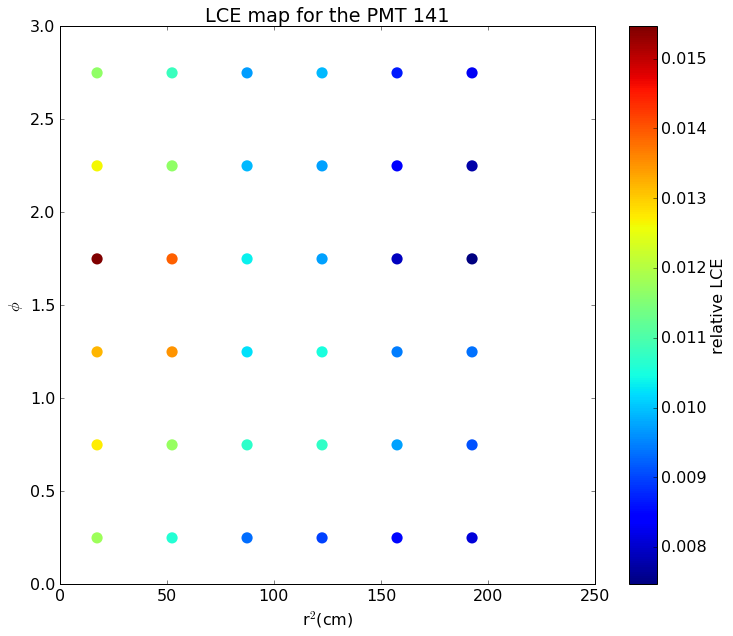

In [34]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)

number_list = []
s1_mean_values=[]

box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_141']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break
       

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result70=ri,zi,s1_mean_values

plt.scatter(result70[0],result70[1], c=result70[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT 141')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
number_list = []
s1_mean_values=[]
resultphi_2s=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):
    for j, r in enumerate(r_slices):    
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        number_list.append(len(dataE2s[box_cut]))    
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_141']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break


s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(6,6)   

resultphi70=ri,phii,s1_mean_values

plt.scatter(resultphi70[0],resultphi70[1], c=resultphi70[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 141')
plt.show()


# PMT 142

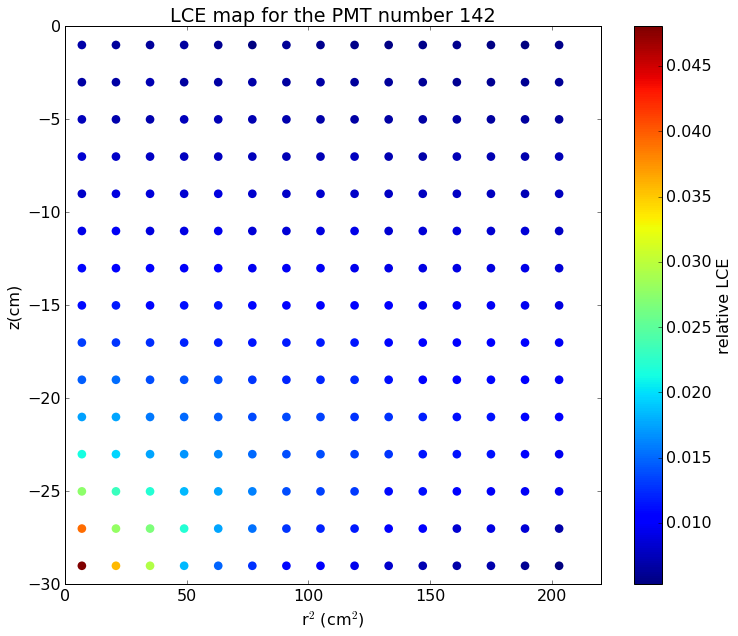

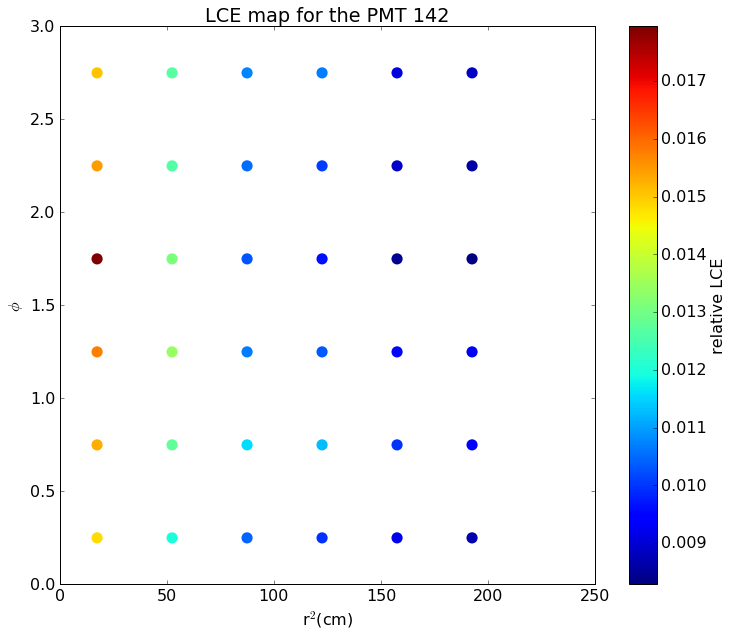

In [35]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_142']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result72=ri,zi,s1_mean_values

plt.scatter(result72[0],result72[1], c=result72[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 142')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_142']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi72=ri,phii,s1_mean_values

LCE141=plt.scatter(resultphi72[0],resultphi72[1], c=resultphi72[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 142')
plt.show()

# PMT 143

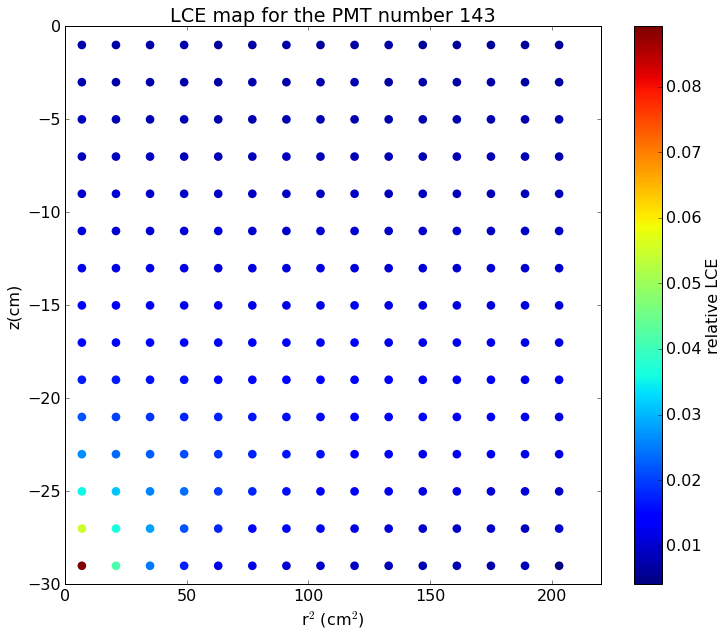

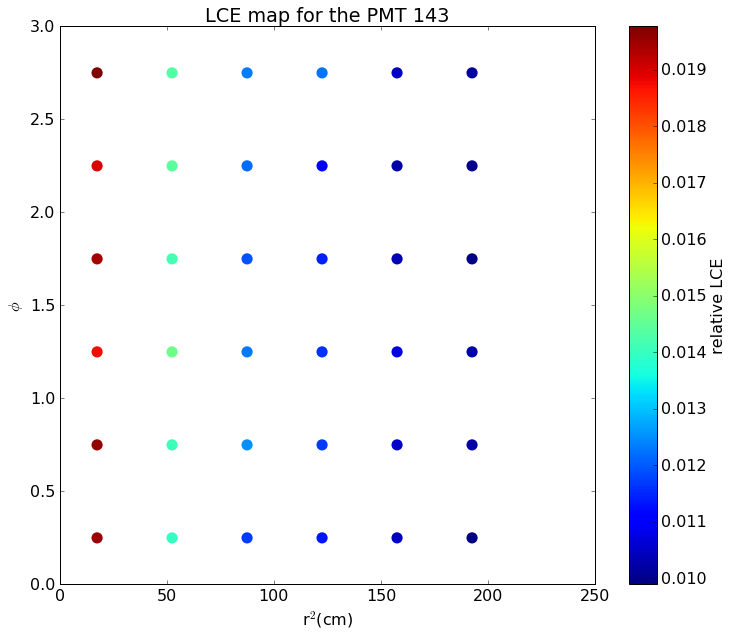

In [36]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_143']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result73=ri,zi,s1_mean_values

plt.scatter(result73[0],result73[1], c=result73[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 143')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_143']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi73=ri,phii,s1_mean_values

plt.scatter(resultphi73[0],resultphi73[1], c=resultphi73[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 143')
plt.show()

# PMT 144

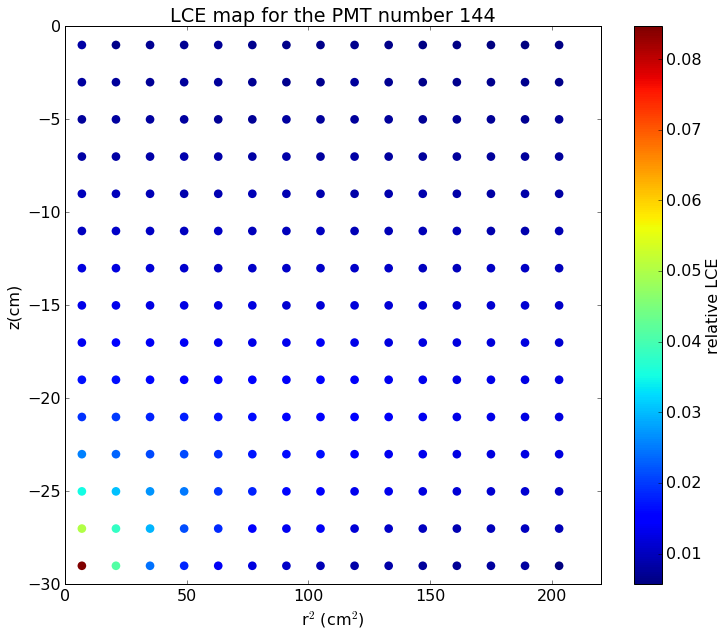

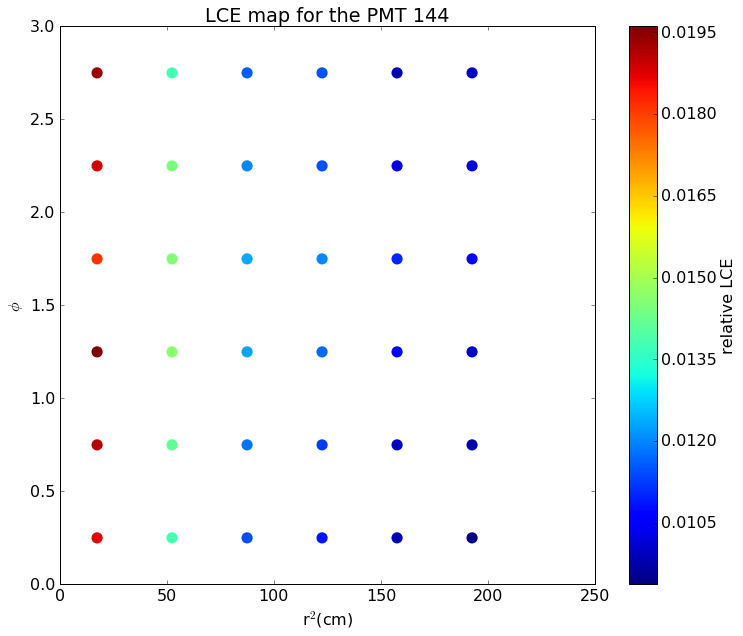

In [37]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_144']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result74=ri,zi,s1_mean_values

plt.scatter(result74[0],result74[1], c=result74[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 144')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_144']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi74=ri,phii,s1_mean_values

plt.scatter(resultphi74[0],resultphi74[1], c=resultphi74[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 144')
plt.show()

# PMT 145

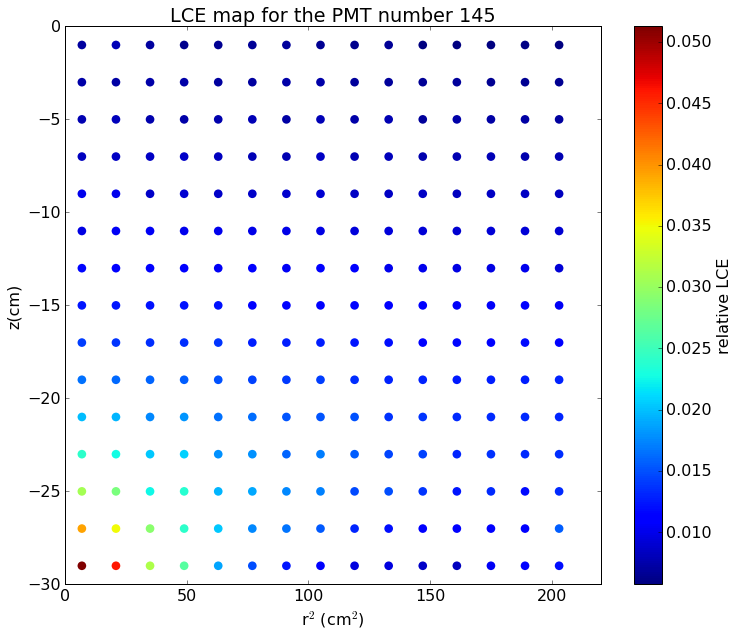

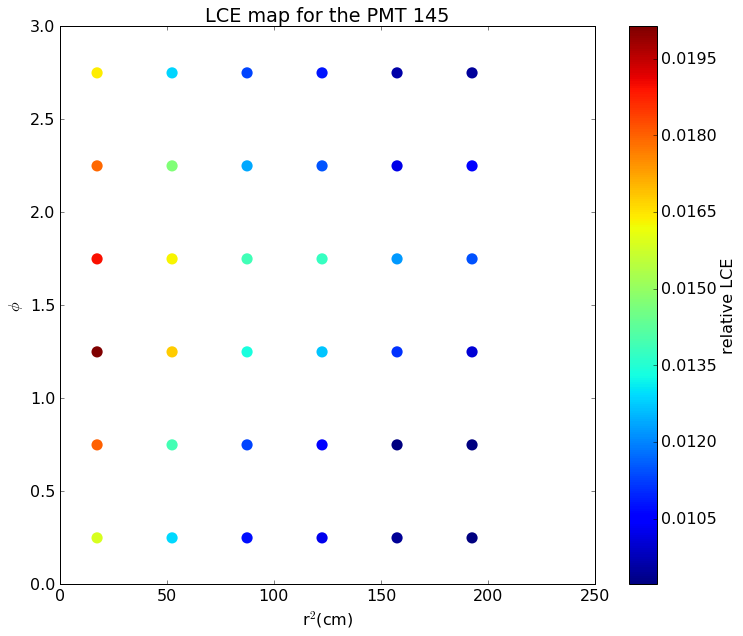

In [38]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_145']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result75=ri,zi,s1_mean_values

plt.scatter(result75[0],result75[1], c=result75[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 145')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_145']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi75=ri,phii,s1_mean_values

plt.scatter(resultphi75[0],resultphi75[1], c=resultphi75[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 145')
plt.show()

# PMT 146

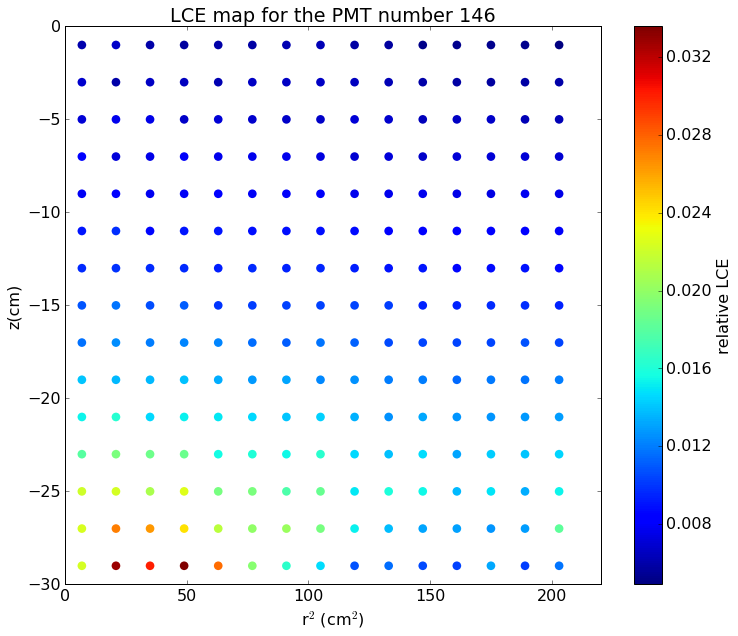

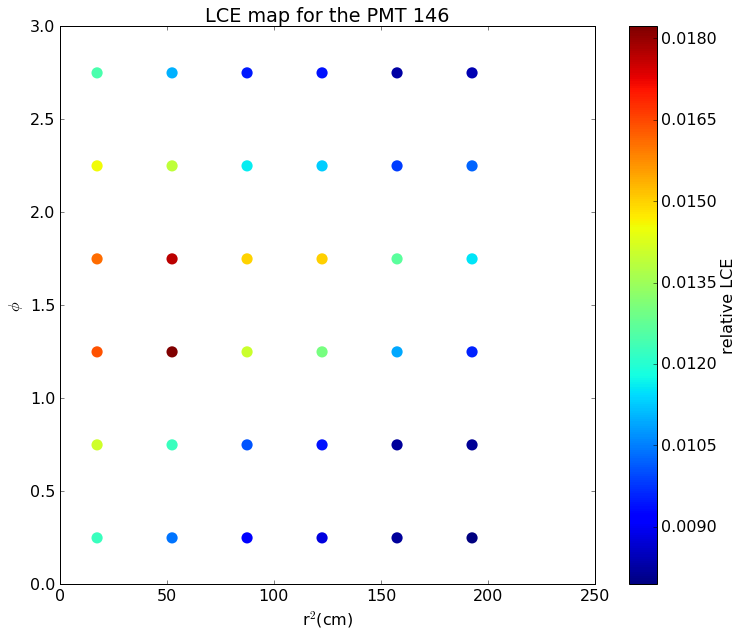

In [39]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_146']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result76=ri,zi,s1_mean_values

plt.scatter(result76[0],result76[1], c=result76[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 146')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_146']/s1_mean_tpc)
                               /len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi76=ri,phii,s1_mean_values

plt.scatter(resultphi76[0],resultphi76[1], c=resultphi76[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 146')
plt.show()

# PMT 147

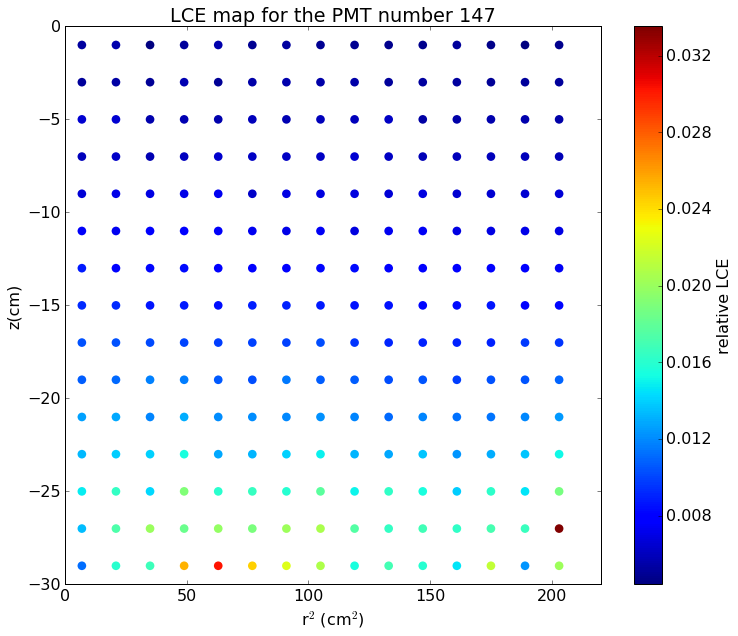

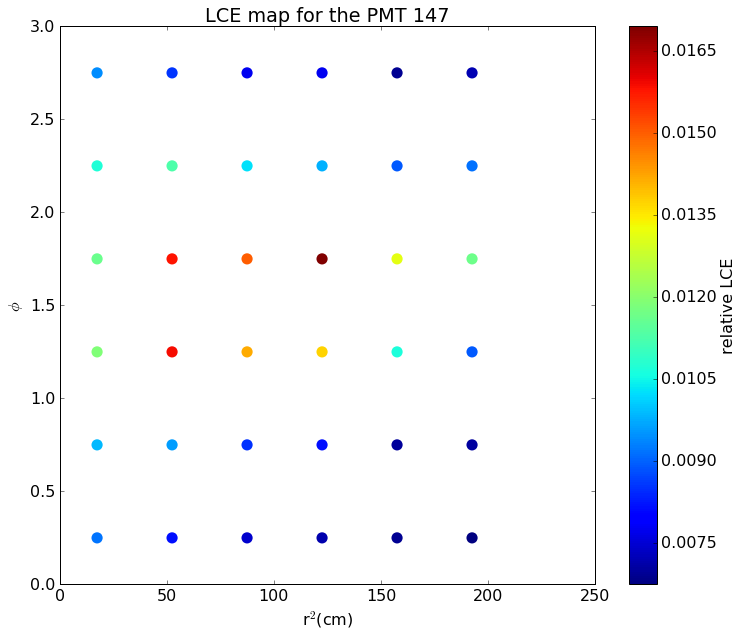

In [40]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_147']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result77=ri,zi,s1_mean_values

plt.scatter(result77[0],result77[1], c=result77[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 147')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_147']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi77=ri,phii,s1_mean_values

plt.scatter(resultphi77[0],resultphi77[1], c=resultphi77[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 147')
plt.show()

# PMT 148

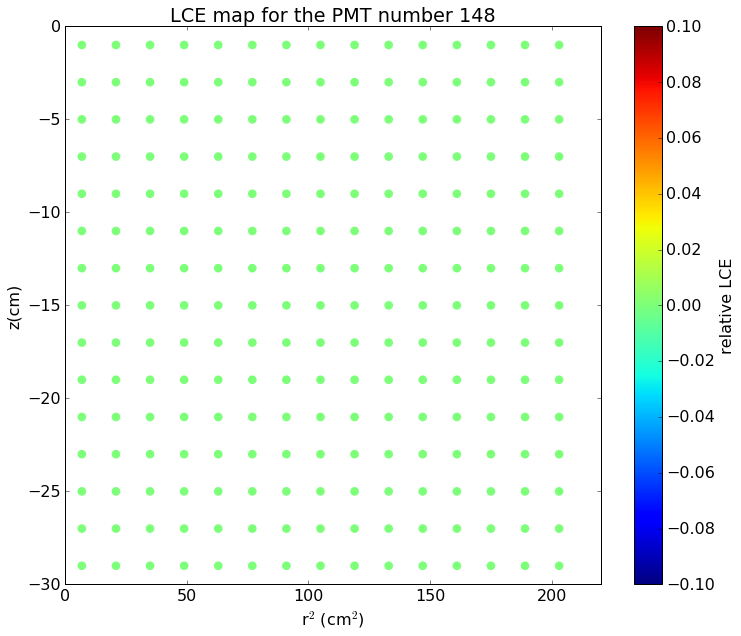

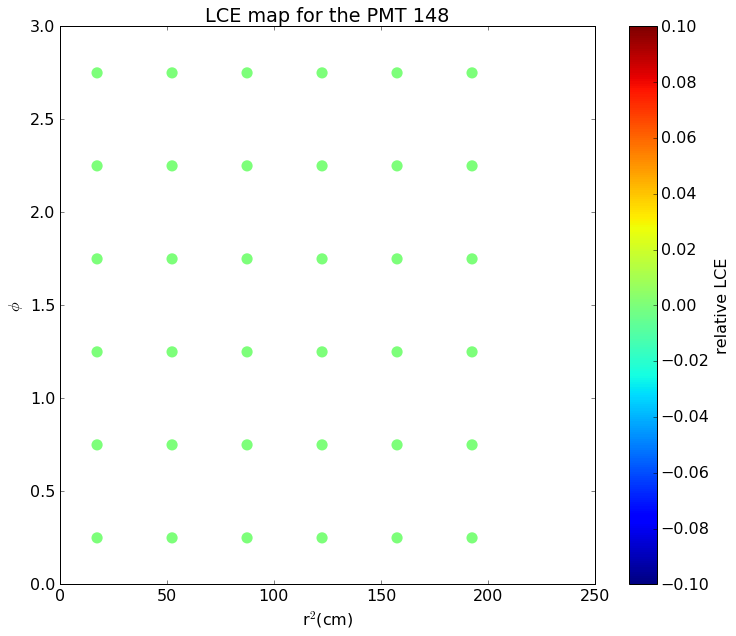

In [41]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_148']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result78=ri,zi,s1_mean_values

plt.scatter(result78[0],result78[1], c=result78[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 148')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_148']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi78=ri,phii,s1_mean_values

plt.scatter(resultphi78[0],resultphi78[1], c=resultphi78[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 148')
plt.show()

# PMT 149

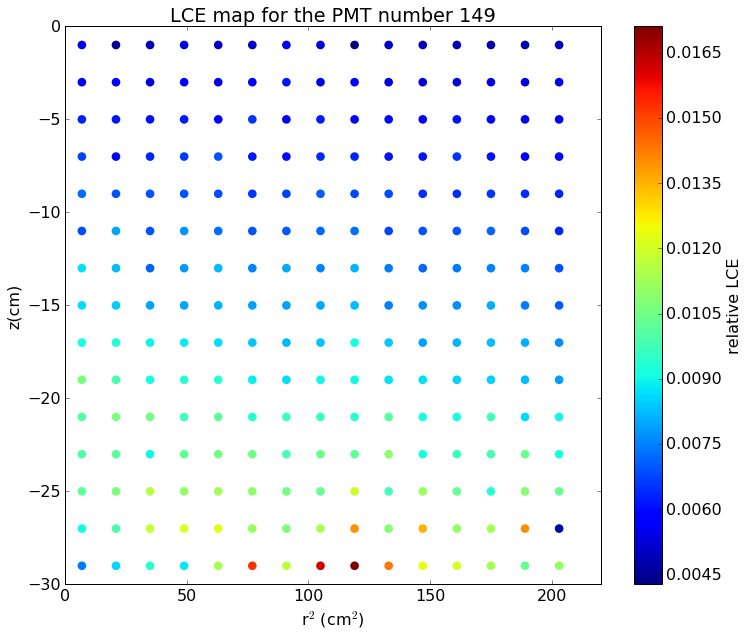

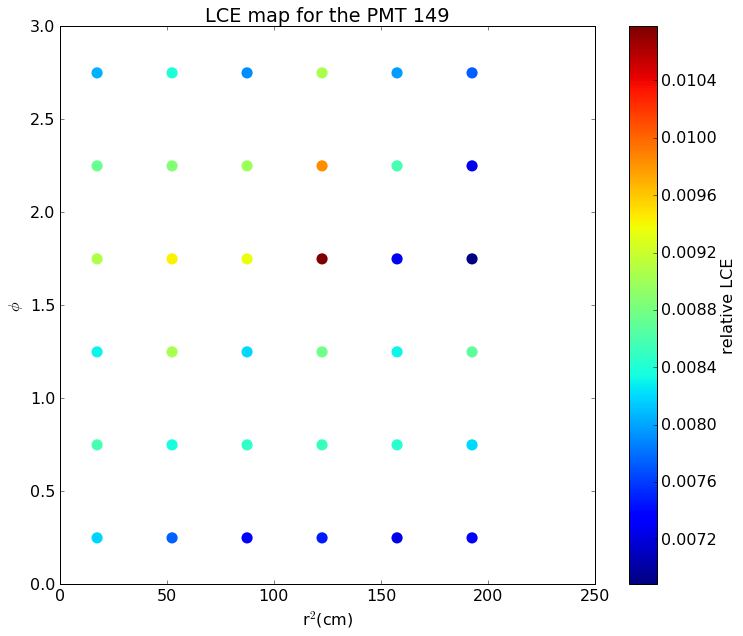

In [42]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_149']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result79=ri,zi,s1_mean_values

plt.scatter(result79[0],result79[1], c=result79[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 149')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_149']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi79=ri,phii,s1_mean_values

plt.scatter(resultphi79[0],resultphi79[1], c=resultphi79[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 149')
plt.show()

# PMT 150

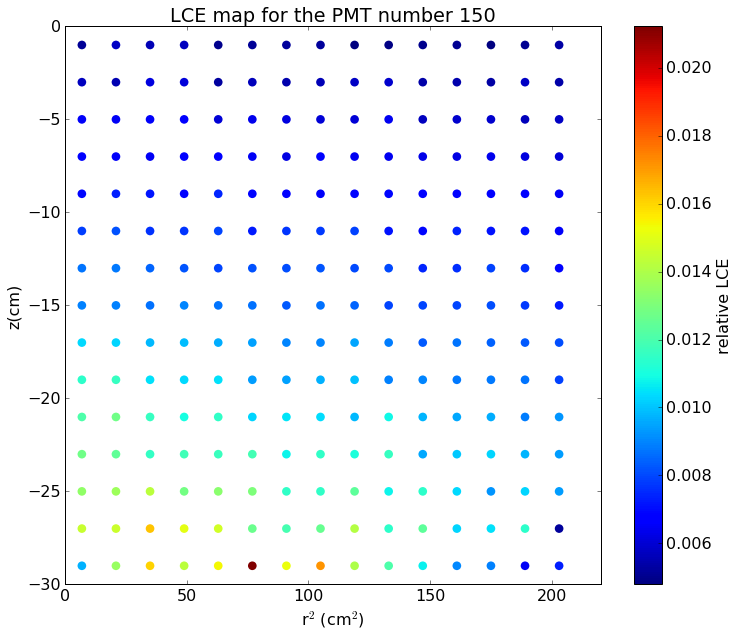

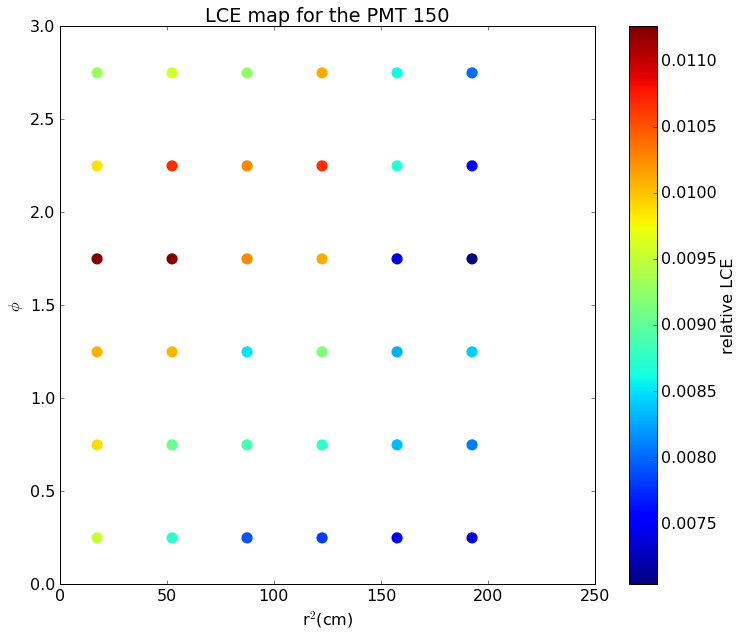

In [43]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_150']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result80=ri,zi,s1_mean_values

plt.scatter(result80[0],result80[1], c=result80[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 150')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_150']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi80=ri,phii,s1_mean_values

plt.scatter(resultphi80[0],resultphi80[1], c=resultphi80[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 150')
plt.show()

# PMT 151

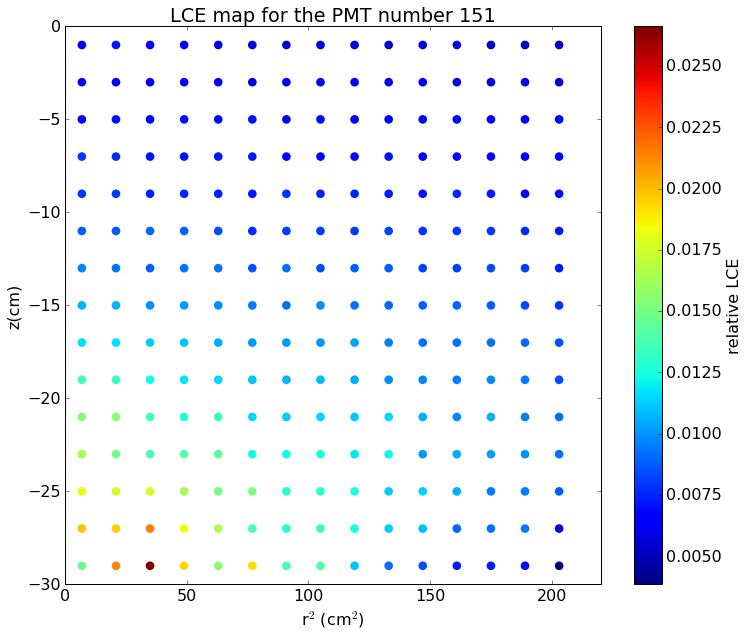

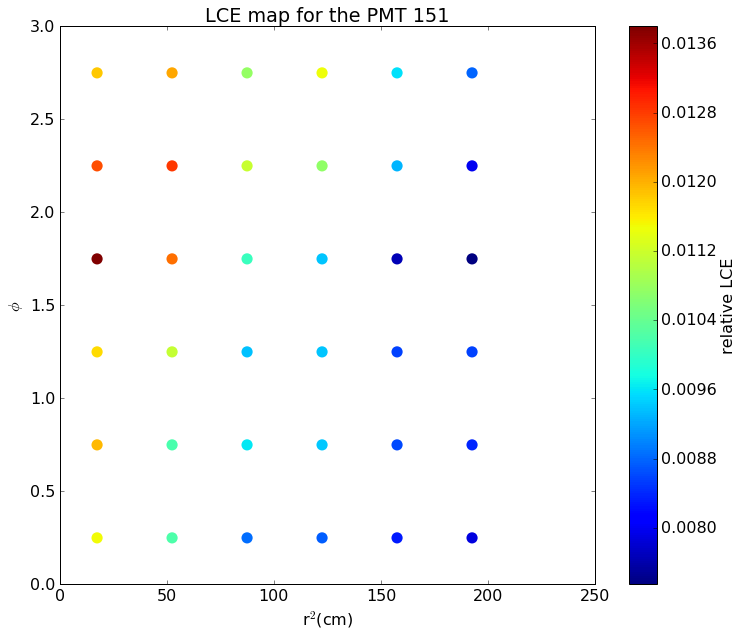

In [44]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_151']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result81=ri,zi,s1_mean_values

plt.scatter(result81[0],result81[1], c=result81[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 151')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_151']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi81=ri,phii,s1_mean_values

plt.scatter(resultphi81[0],resultphi81[1], c=resultphi81[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 151')
plt.show()

# PMT 152

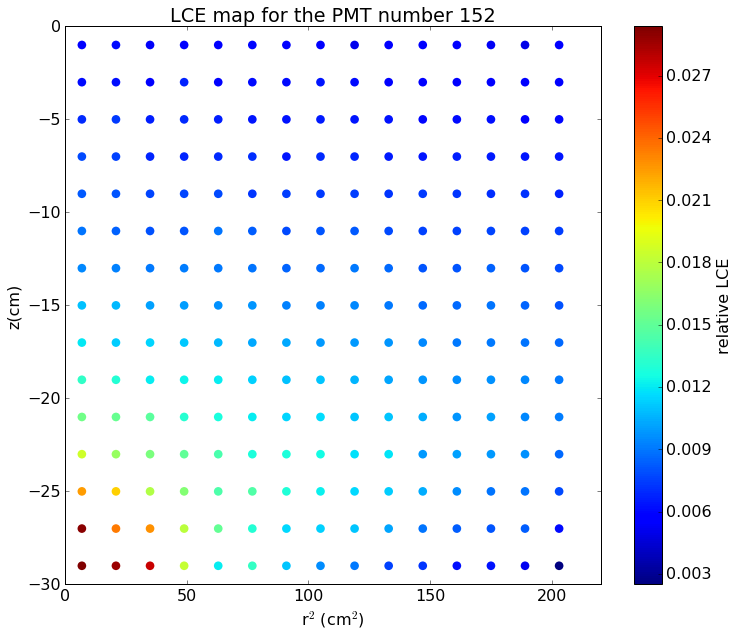

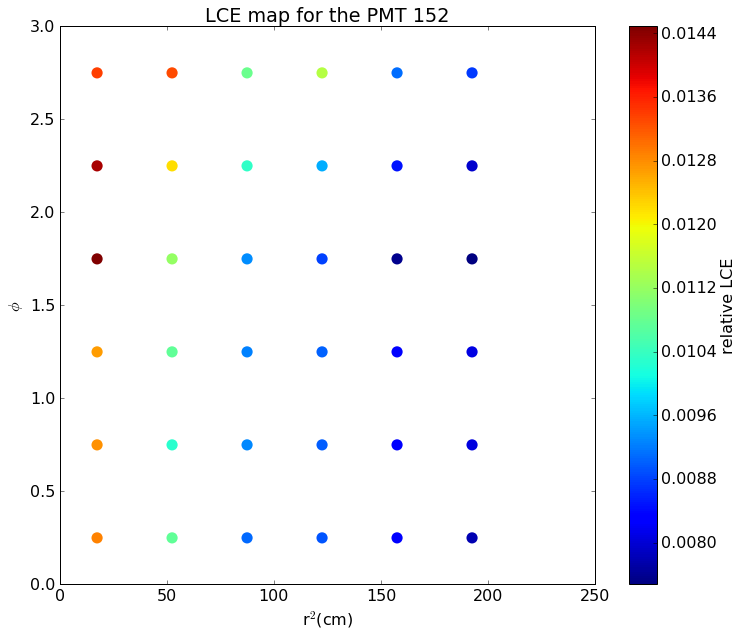

In [45]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_152']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result82=ri,zi,s1_mean_values

plt.scatter(result82[0],result82[1], c=result82[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 152')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_152']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi82=ri,phii,s1_mean_values

plt.scatter(resultphi82[0],resultphi82[1], c=resultphi82[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 152')
plt.show()

# PMT 153

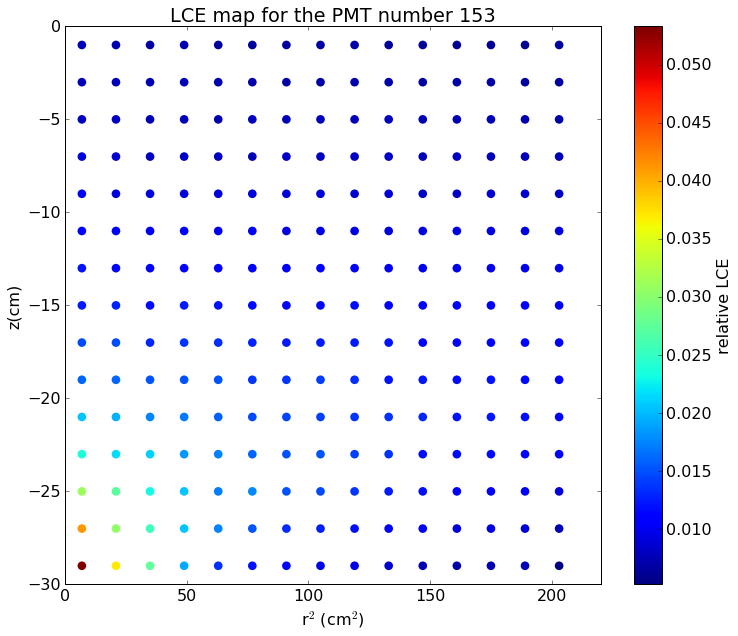

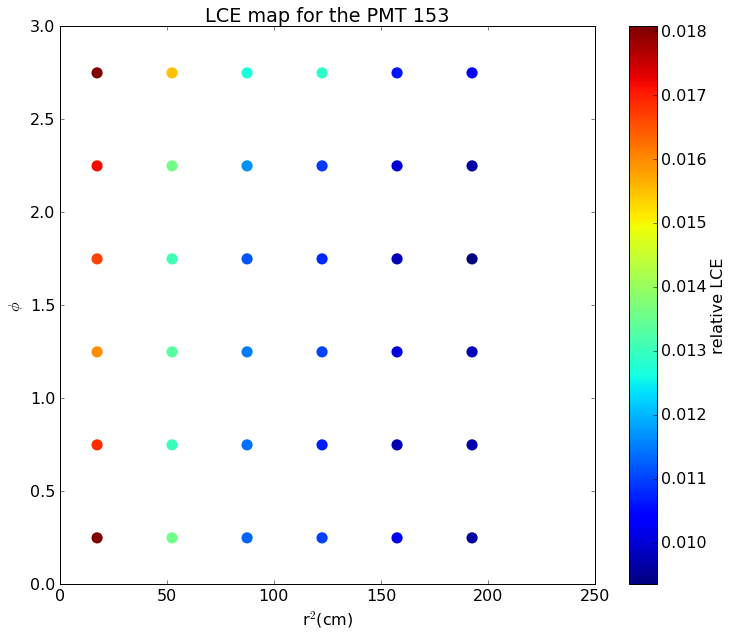

In [46]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_153']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result83=ri,zi,s1_mean_values

plt.scatter(result83[0],result83[1], c=result83[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 153')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_153']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi83=ri,phii,s1_mean_values

plt.scatter(resultphi83[0],resultphi83[1], c=resultphi83[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 153')
plt.show()

# PMT 154

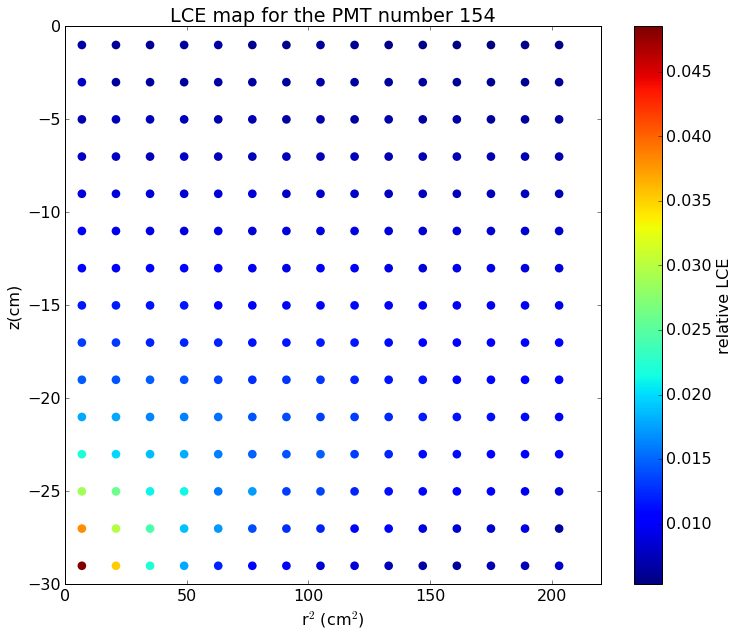

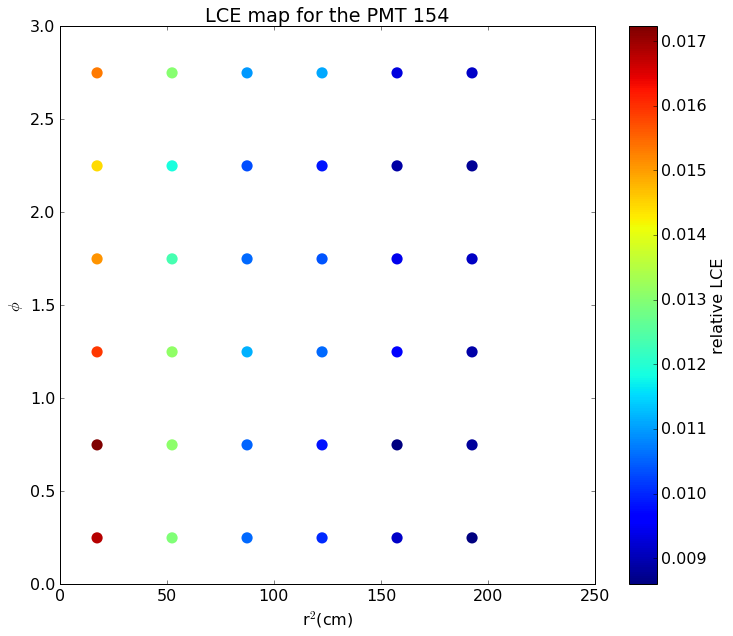

In [47]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_154']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result84=ri,zi,s1_mean_values

plt.scatter(result84[0],result84[1], c=result84[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 154')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_154']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi84=ri,phii,s1_mean_values

plt.scatter(resultphi84[0],resultphi84[1], c=resultphi84[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 154')
plt.show()

# PMT 155

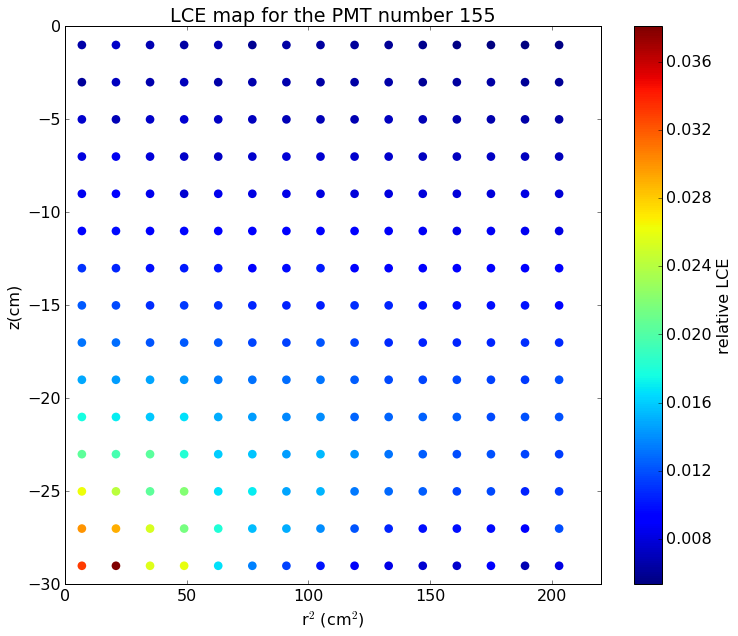

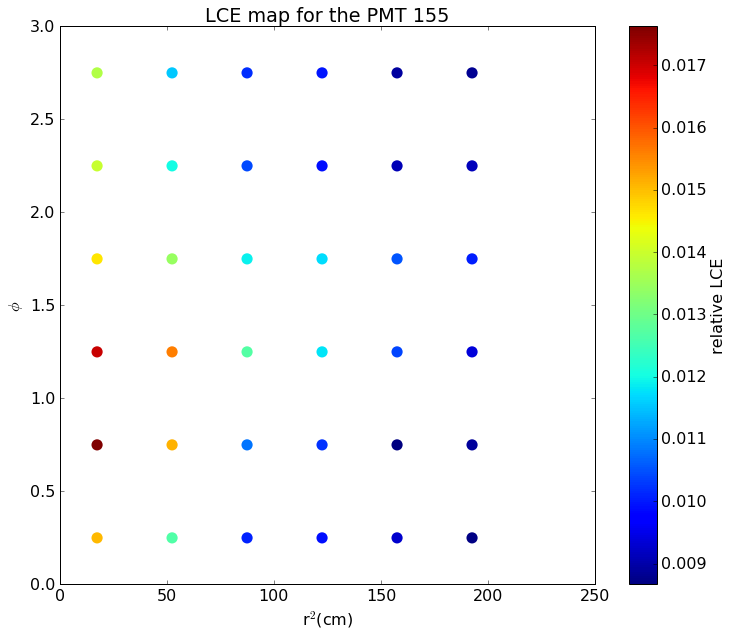

In [48]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_155']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result85=ri,zi,s1_mean_values

plt.scatter(result85[0],result85[1], c=result85[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 155')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_155']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi85=ri,phii,s1_mean_values

plt.scatter(resultphi85[0],resultphi85[1], c=resultphi85[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 155')
plt.show()

# PMT 156

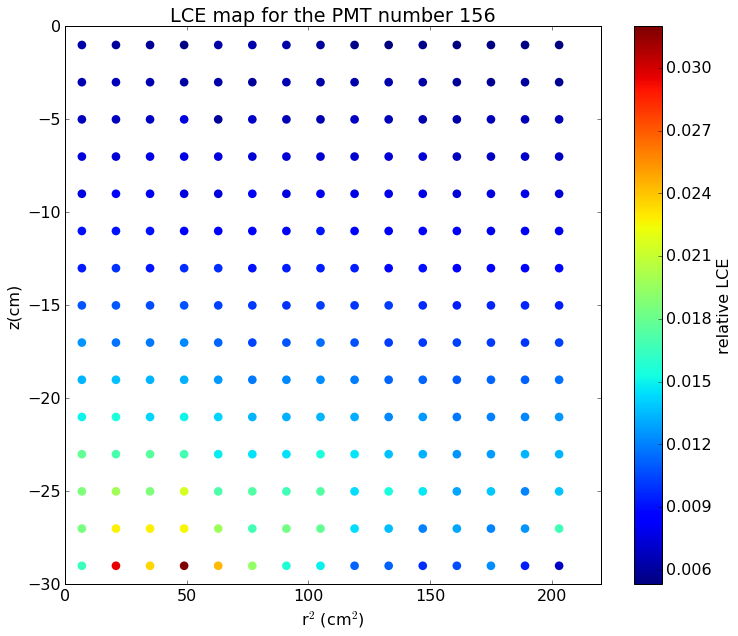

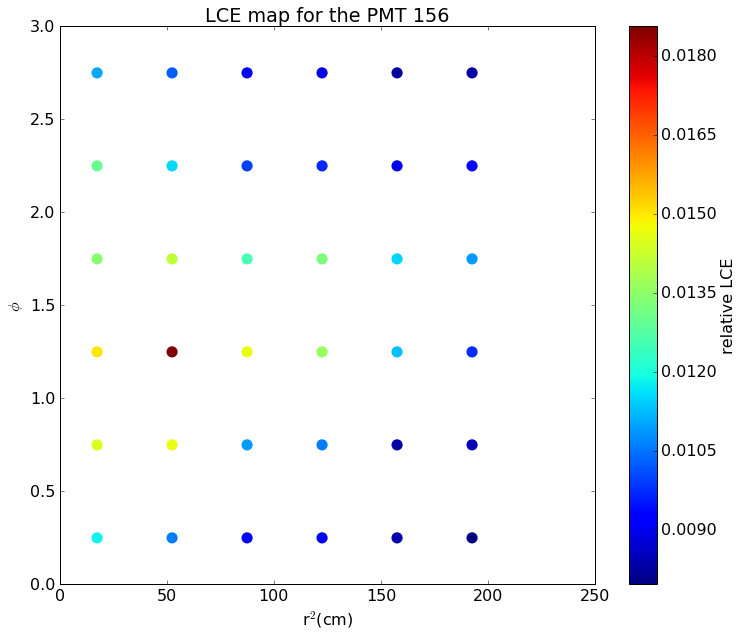

In [49]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_156']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result86=ri,zi,s1_mean_values

plt.scatter(result86[0],result86[1], c=result86[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 156')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_156']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi86=ri,phii,s1_mean_values

plt.scatter(resultphi86[0],resultphi86[1], c=resultphi86[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 156')
plt.show()

# PMT 157

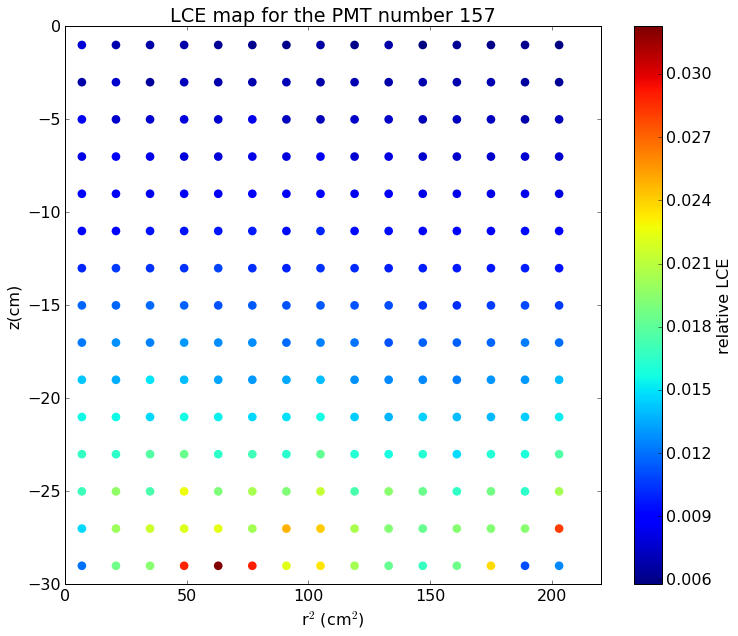

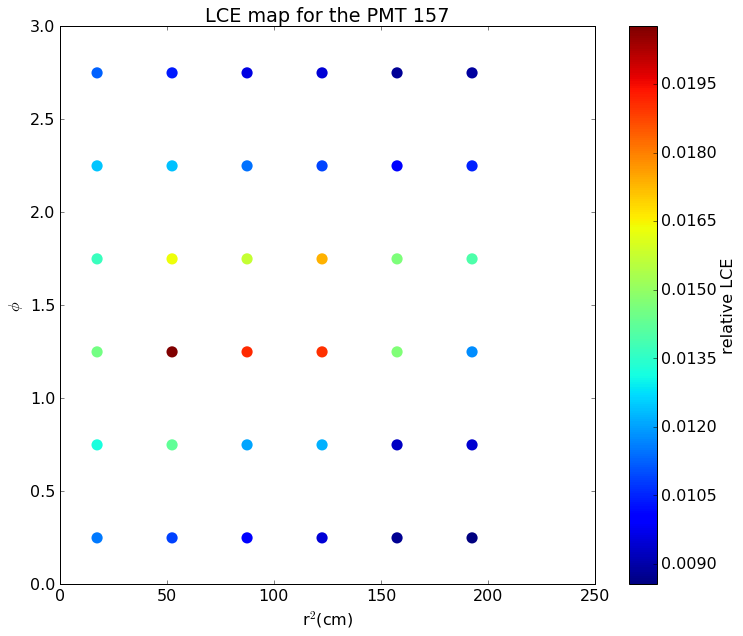

In [50]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_157']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result87=ri,zi,s1_mean_values

plt.scatter(result87[0],result87[1], c=result87[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 157')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_157']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi87=ri,phii,s1_mean_values

plt.scatter(resultphi87[0],resultphi87[1], c=resultphi87[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 157')
plt.show()

# PMT 158

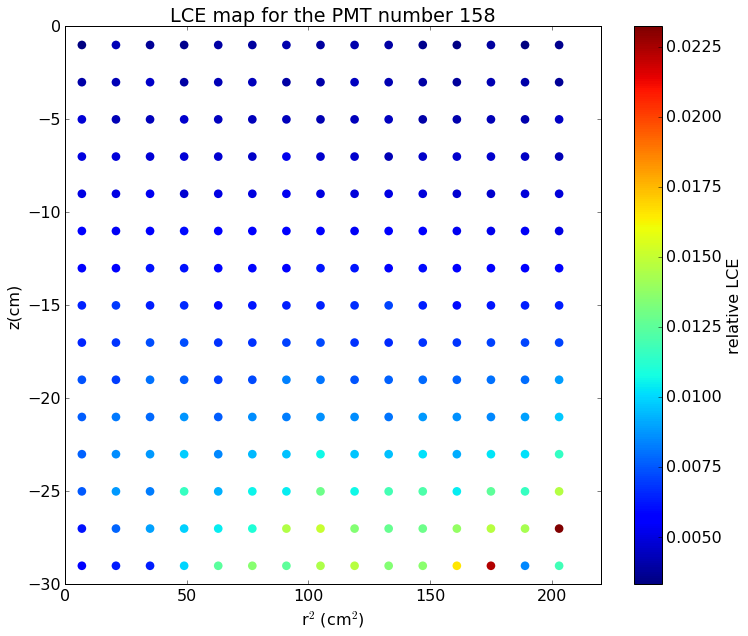

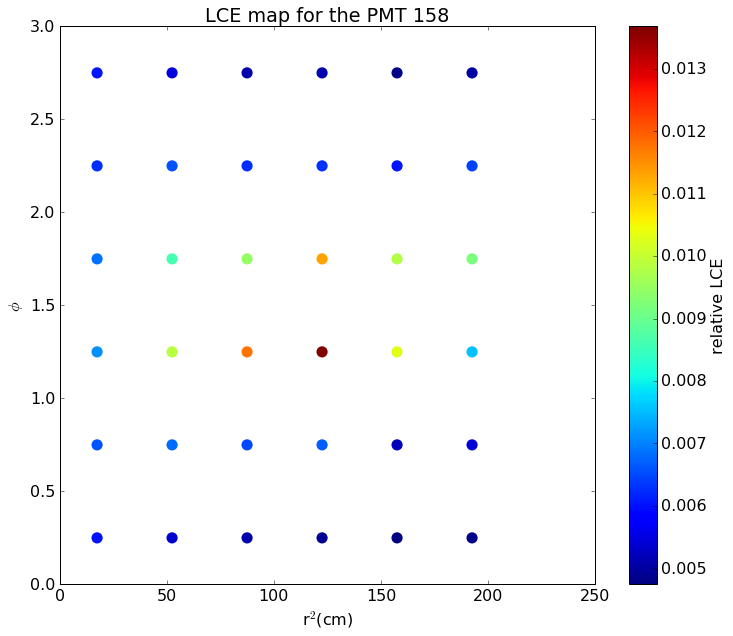

In [51]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_158']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result88=ri,zi,s1_mean_values

plt.scatter(result88[0],result88[1], c=result88[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 158')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_158']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi88=ri,phii,s1_mean_values

plt.scatter(resultphi88[0],resultphi88[1], c=resultphi88[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 158')
plt.show()

# PMT 159 

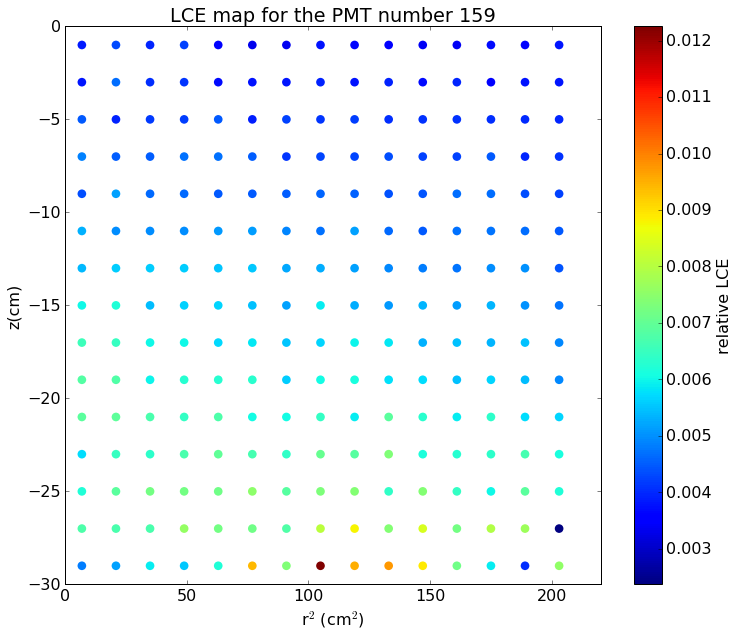

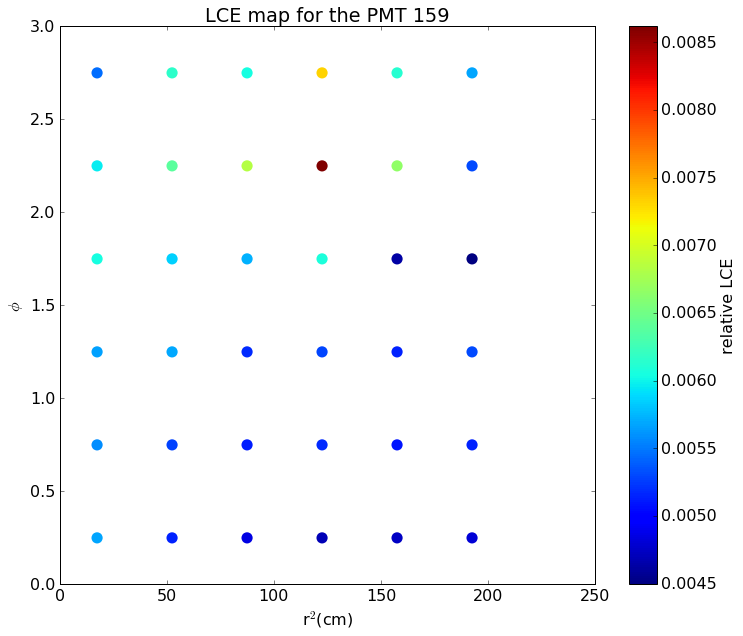

In [52]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_159']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result89=ri,zi,s1_mean_values

plt.scatter(result89[0],result89[1], c=result89[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 159')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_159']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi89=ri,phii,s1_mean_values

plt.scatter(resultphi89[0],resultphi89[1], c=resultphi89[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 159')
plt.show()

# PMT 160

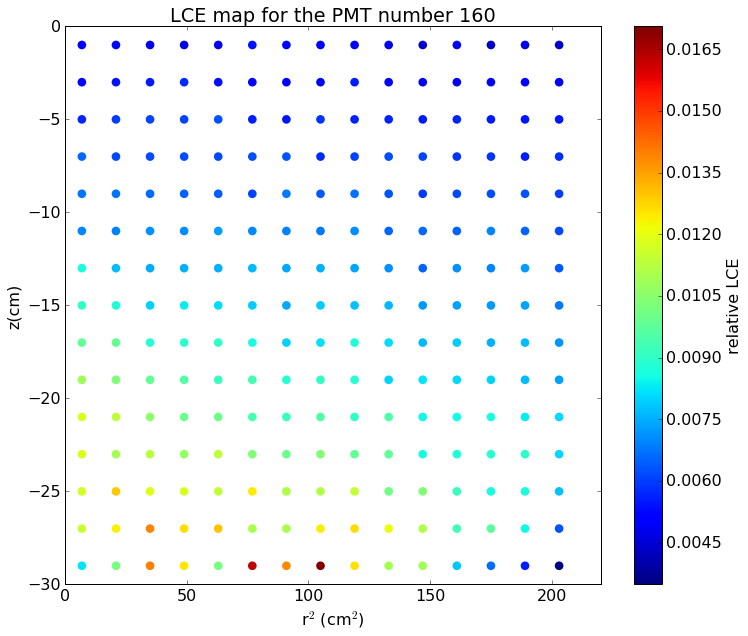

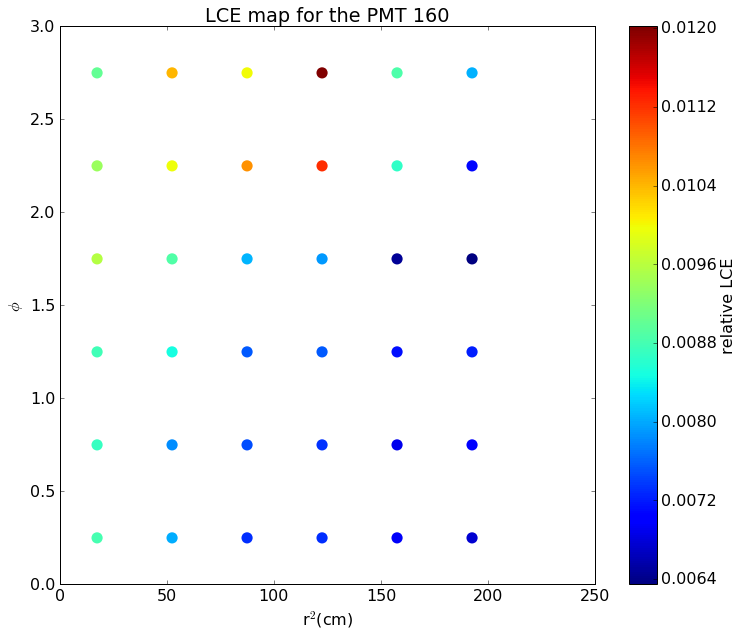

In [53]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_160']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result90=ri,zi,s1_mean_values

plt.scatter(result90[0],result90[1], c=result90[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 160')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_160']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi90=ri,phii,s1_mean_values

plt.scatter(resultphi90[0],resultphi90[1], c=resultphi90[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 160')
plt.show()

# PMT 161

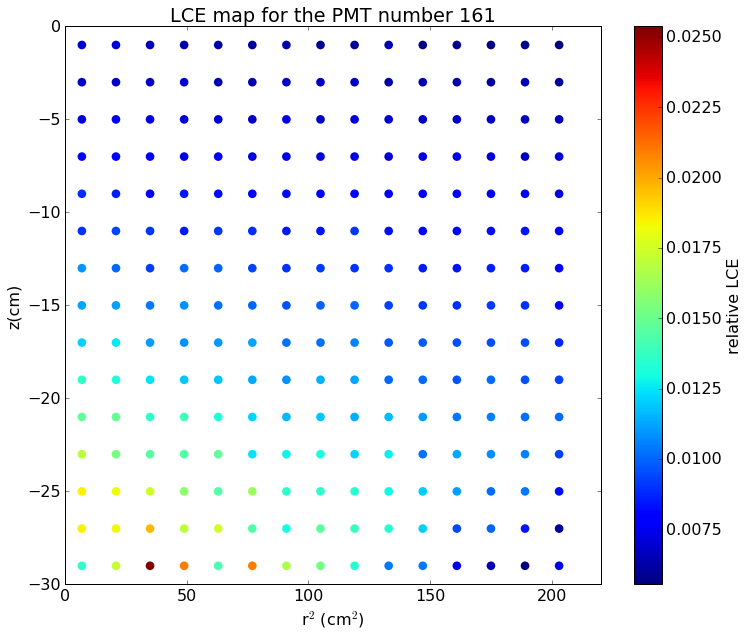

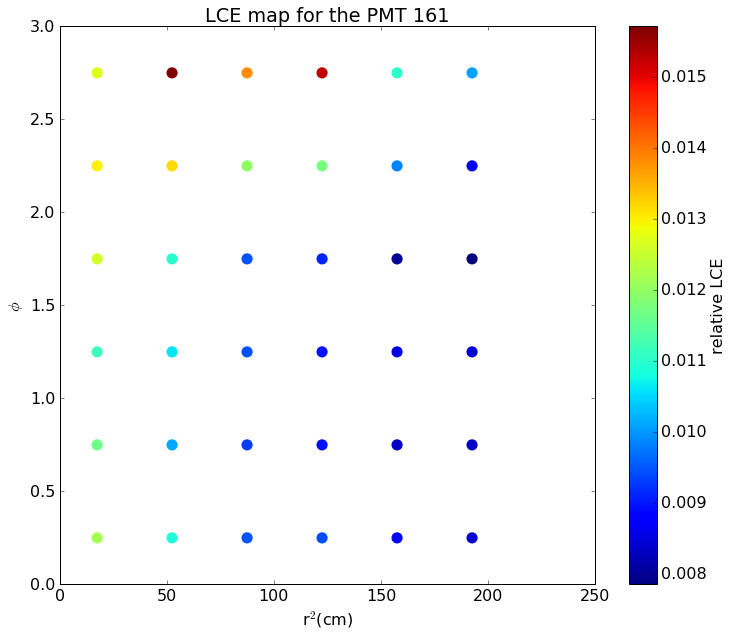

In [54]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_161']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result91=ri,zi,s1_mean_values

plt.scatter(result91[0],result91[1], c=result91[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 161')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_161']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi91=ri,phii,s1_mean_values

plt.scatter(resultphi91[0],resultphi91[1], c=resultphi91[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 161')
plt.show()

# PMT 162

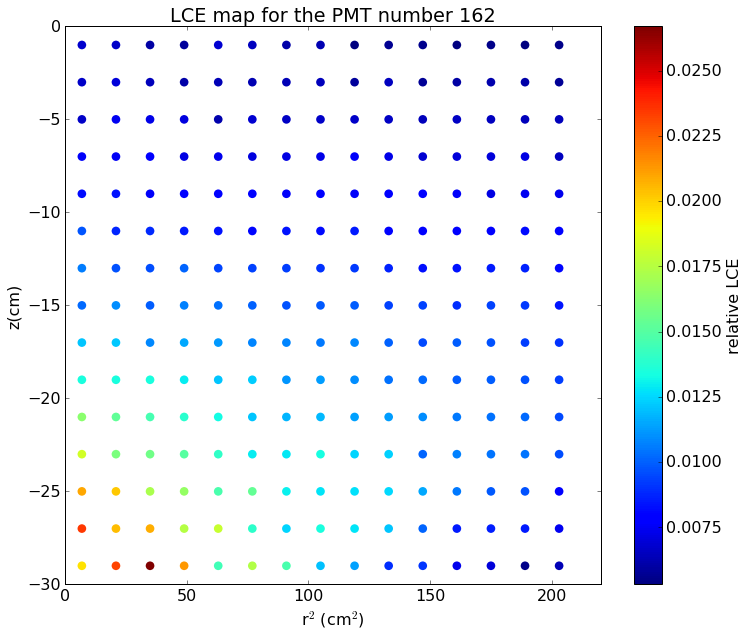

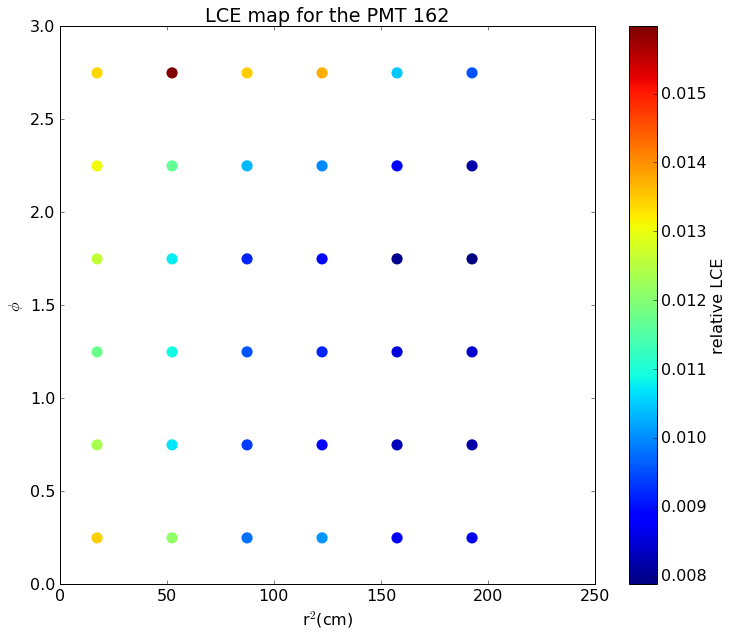

In [56]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_162']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result92=ri,zi,s1_mean_values

plt.scatter(result92[0],result92[1], c=result92[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 162')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_162']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi92=ri,phii,s1_mean_values

plt.scatter(resultphi92[0],resultphi92[1], c=resultphi92[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 162')
plt.show()

# PMT 163

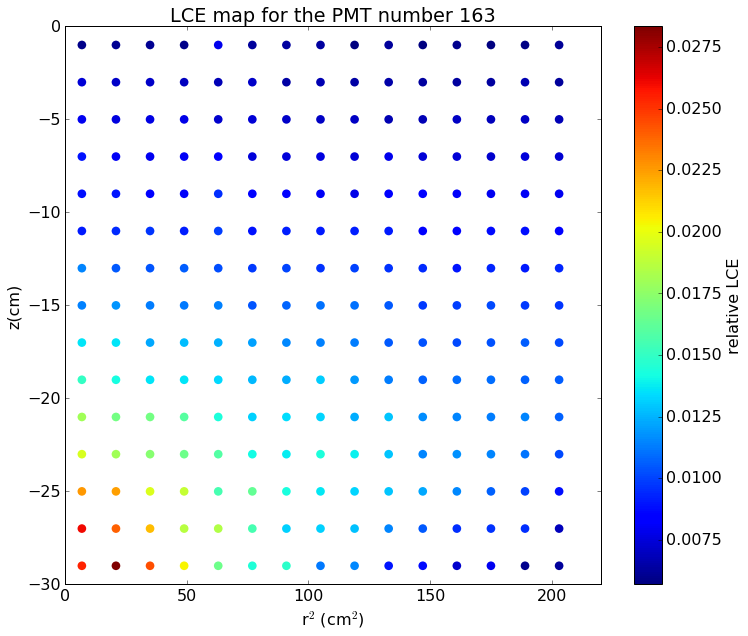

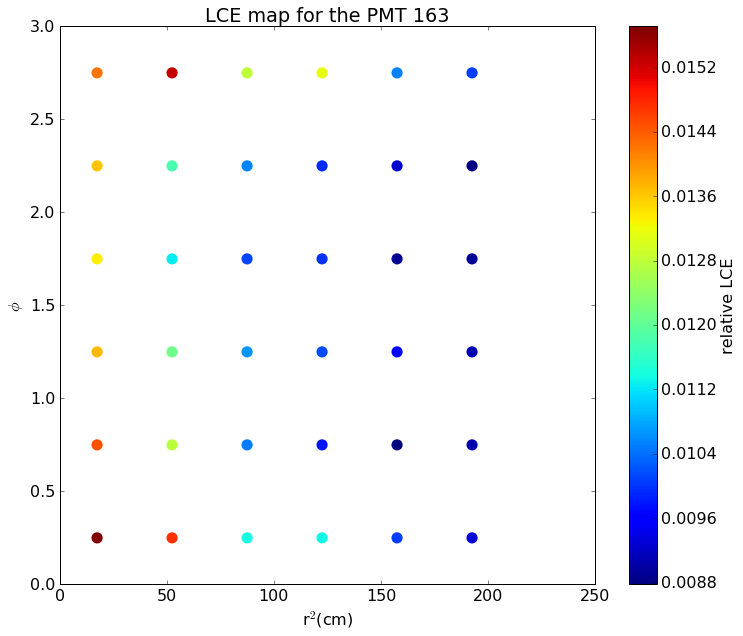

In [57]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_163']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result93=ri,zi,s1_mean_values

plt.scatter(result93[0],result93[1], c=result93[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 163')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_163']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi93=ri,phii,s1_mean_values

plt.scatter(resultphi93[0],resultphi93[1], c=resultphi93[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 163')
plt.show()

# PMT 164

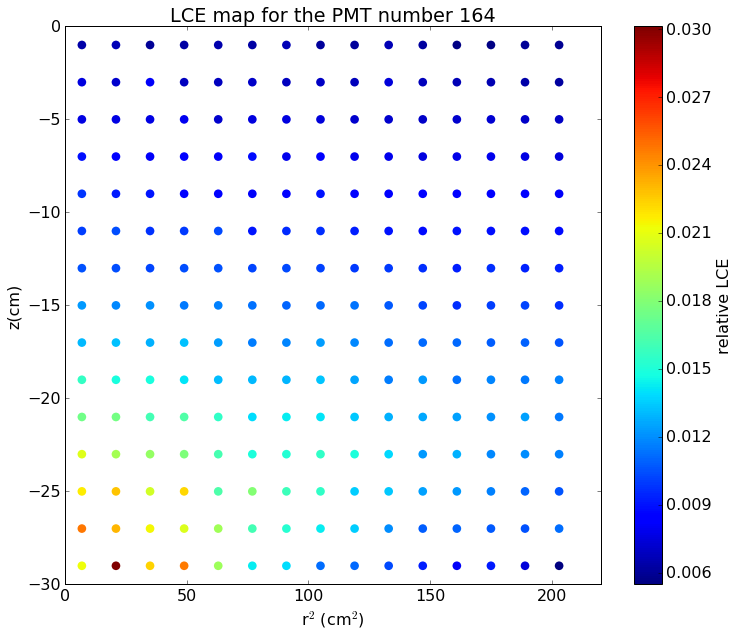

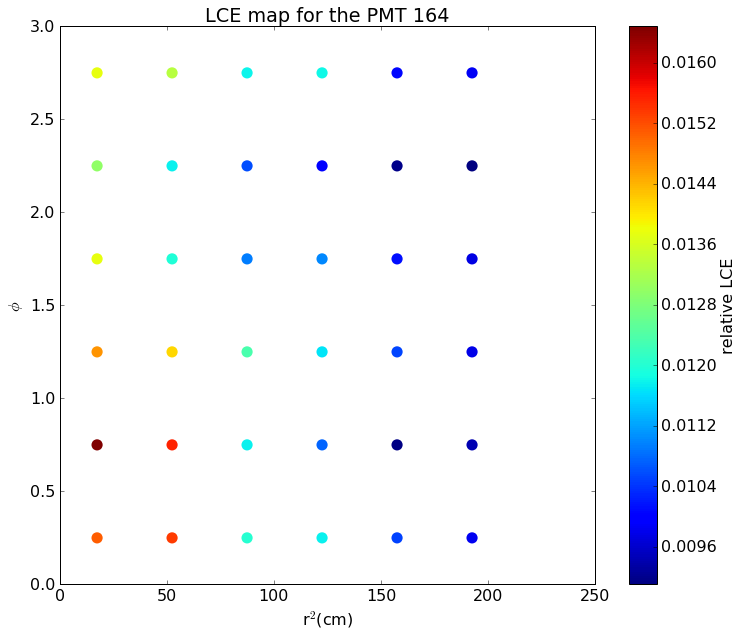

In [58]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_164']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result94=ri,zi,s1_mean_values

plt.scatter(result94[0],result94[1], c=result94[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 164')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_164']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi94=ri,phii,s1_mean_values

plt.scatter(resultphi94[0],resultphi94[1], c=resultphi94[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 164')
plt.show()

# PMT 165

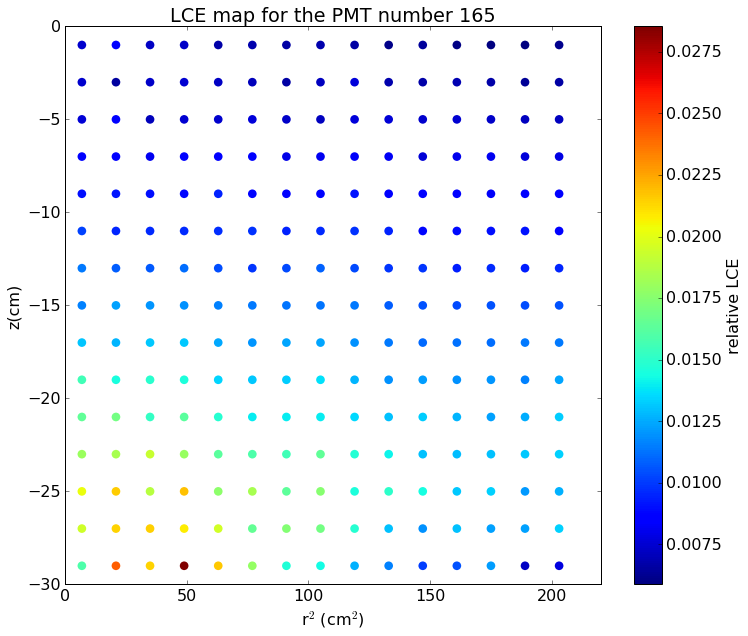

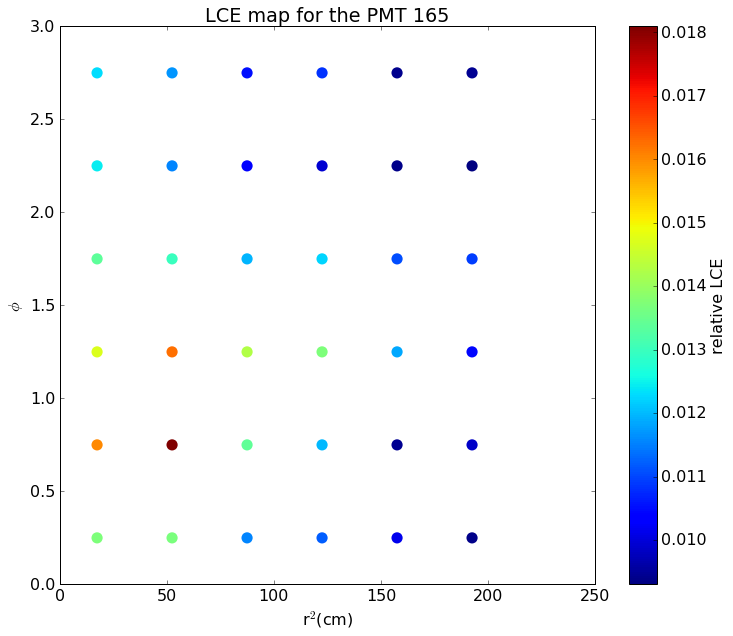

In [59]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_165']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result95=ri,zi,s1_mean_values

plt.scatter(result95[0],result95[1], c=result95[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 165')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_165']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi95=ri,phii,s1_mean_values

plt.scatter(resultphi95[0],resultphi95[1], c=resultphi95[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 165')
plt.show()

# PMT 166

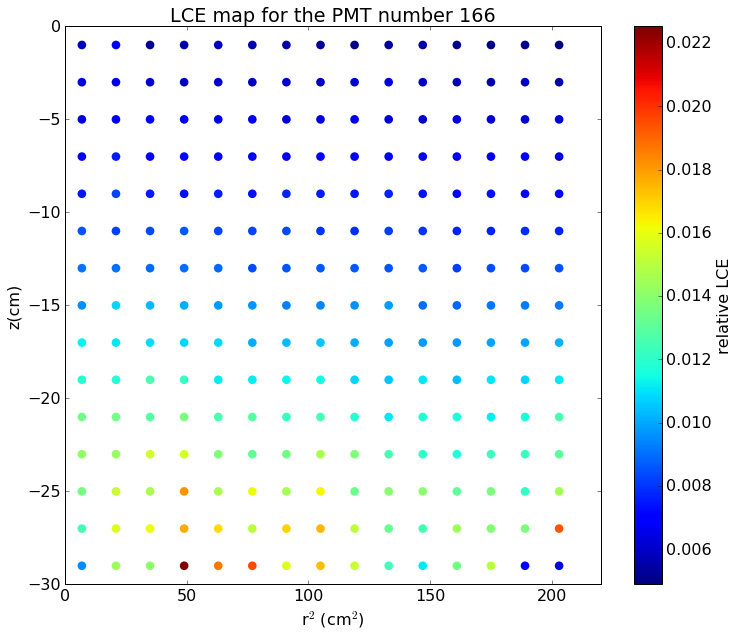

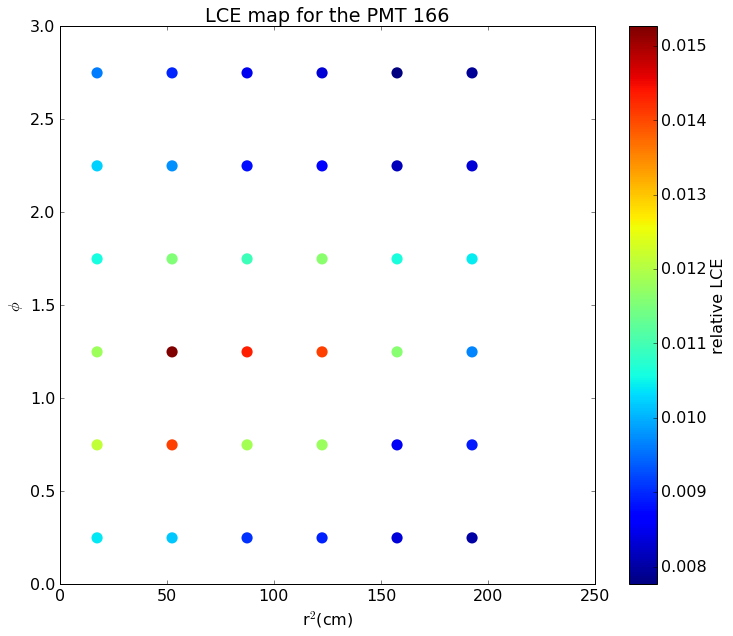

In [60]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_166']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result96=ri,zi,s1_mean_values

plt.scatter(result96[0],result96[1], c=result96[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 166')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_166']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi96=ri,phii,s1_mean_values

plt.scatter(resultphi96[0],resultphi96[1], c=resultphi96[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 166')
plt.show()

# PMT 167

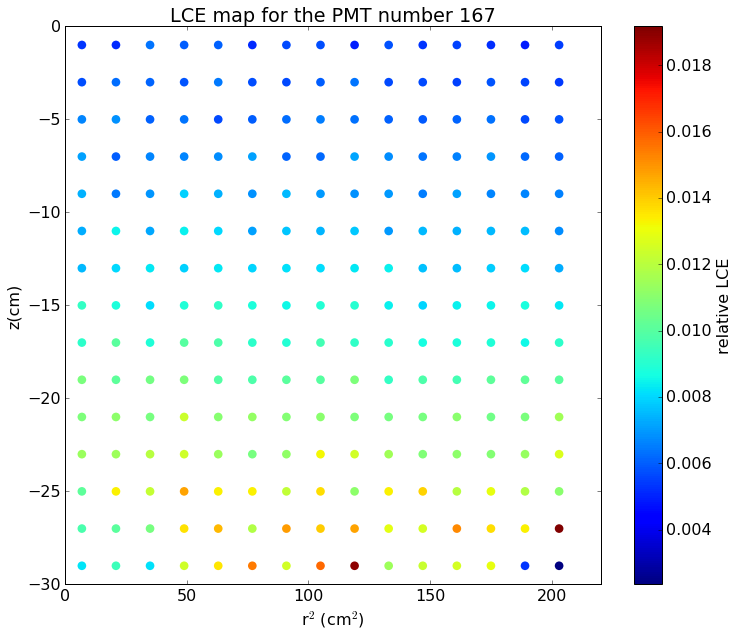

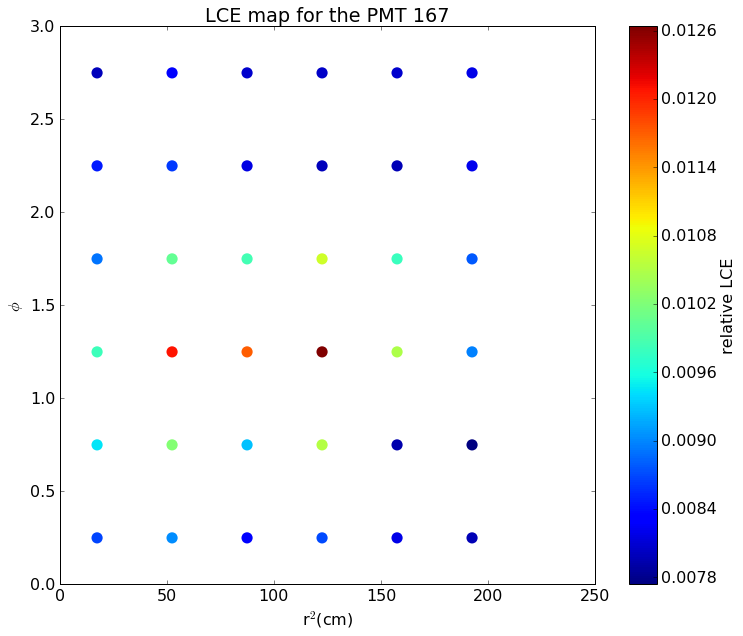

In [61]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_167']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result97=ri,zi,s1_mean_values

plt.scatter(result97[0],result97[1], c=result97[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 167')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_167']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi97=ri,phii,s1_mean_values

plt.scatter(resultphi97[0],resultphi97[1], c=resultphi97[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 167')
plt.show()

# PMT 168

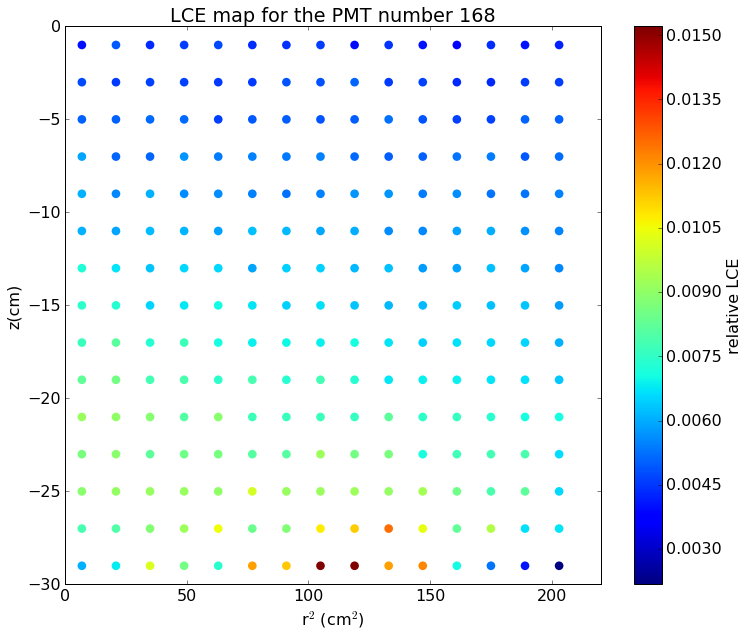

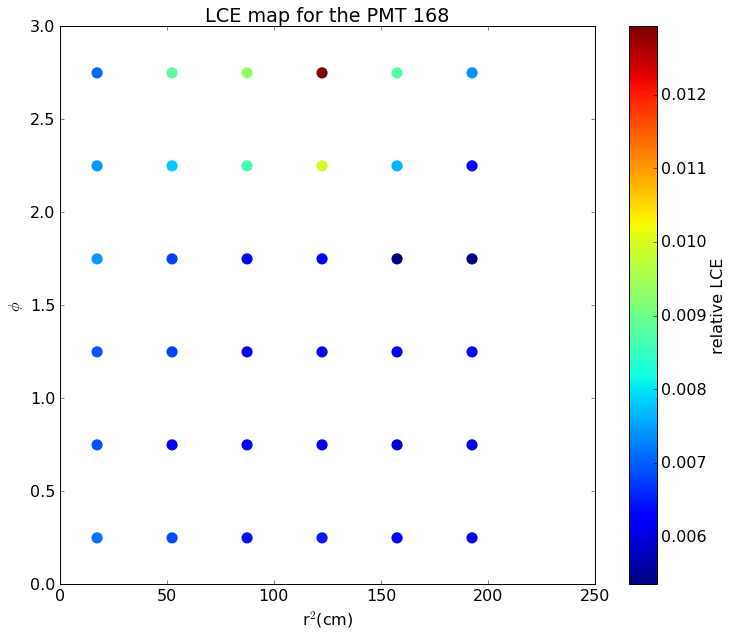

In [62]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_168']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result98=ri,zi,s1_mean_values

plt.scatter(result98[0],result98[1], c=result98[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 168')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_168']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi98=ri,phii,s1_mean_values

plt.scatter(resultphi98[0],resultphi98[1], c=resultphi98[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 168')
plt.show()

# PMT 169

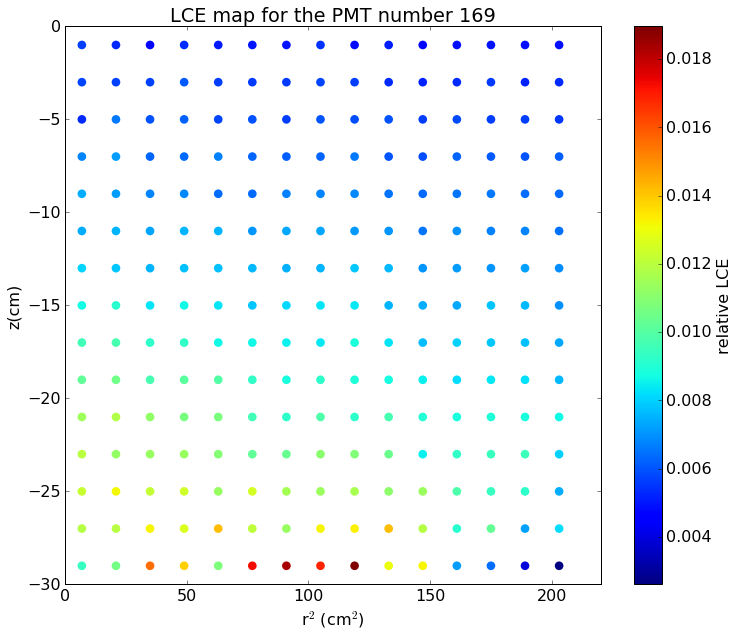

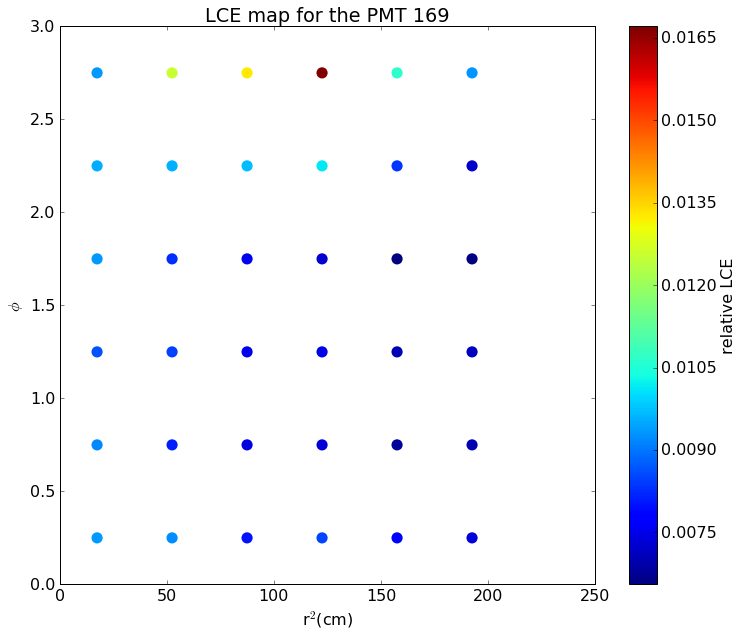

In [63]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_169']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result99=ri,zi,s1_mean_values

plt.scatter(result99[0],result99[1], c=result99[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 169')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_169']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi99=ri,phii,s1_mean_values

plt.scatter(resultphi99[0],resultphi99[1], c=resultphi99[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 169')
plt.show()

# PMT 170

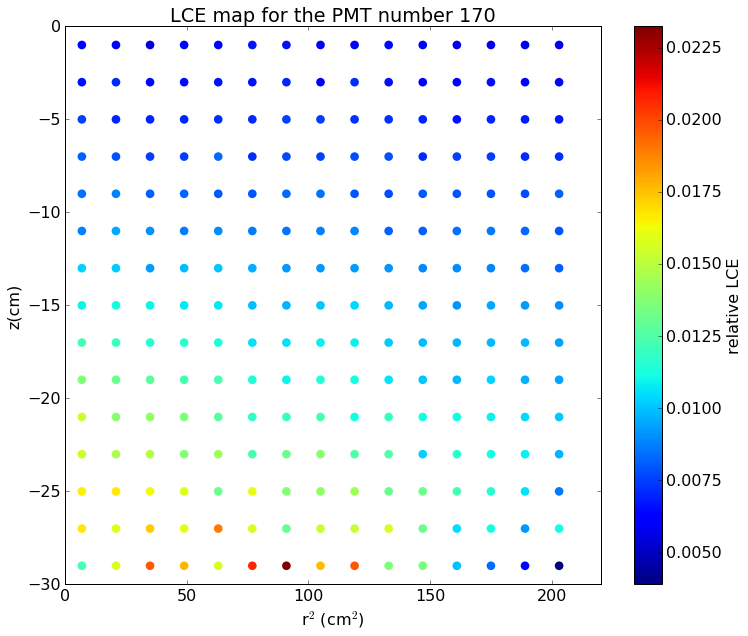

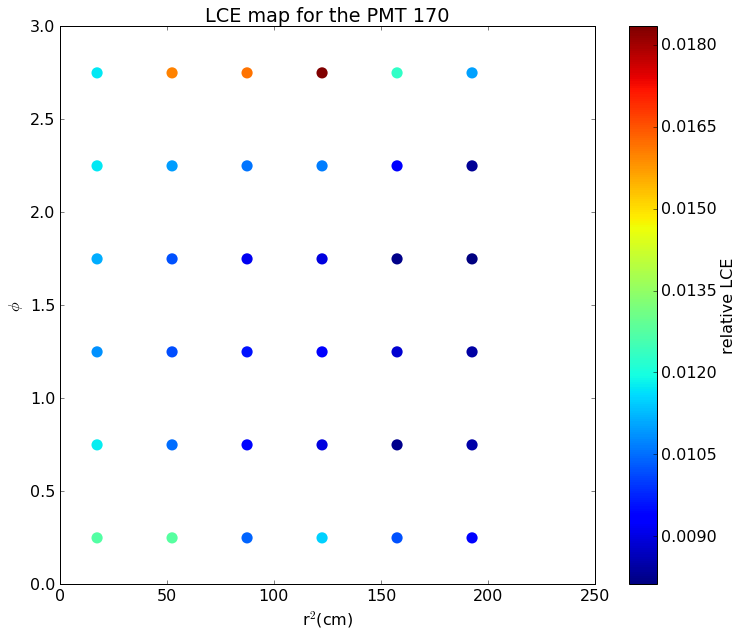

In [64]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_170']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result100=ri,zi,s1_mean_values

plt.scatter(result100[0],result100[1], c=result100[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 170')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_170']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi100=ri,phii,s1_mean_values

plt.scatter(resultphi100[0],resultphi100[1], c=resultphi100[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 170')
plt.show()

# PMT 171

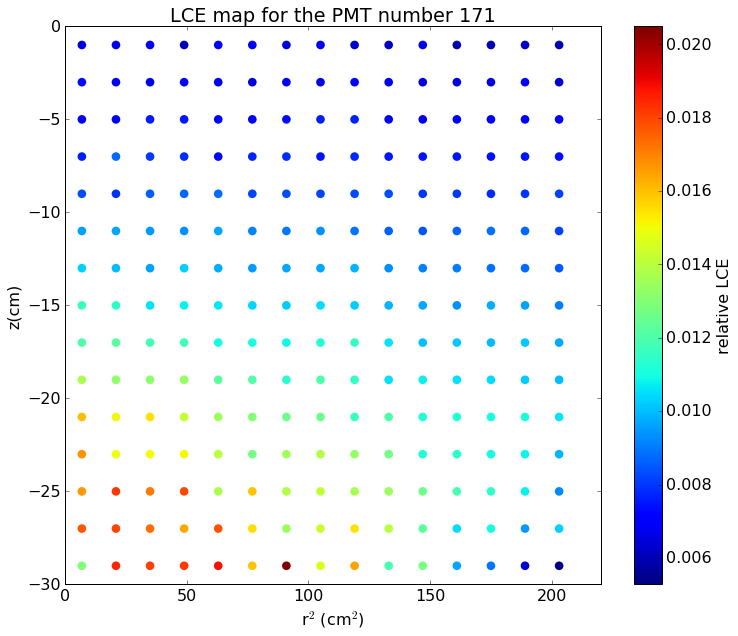

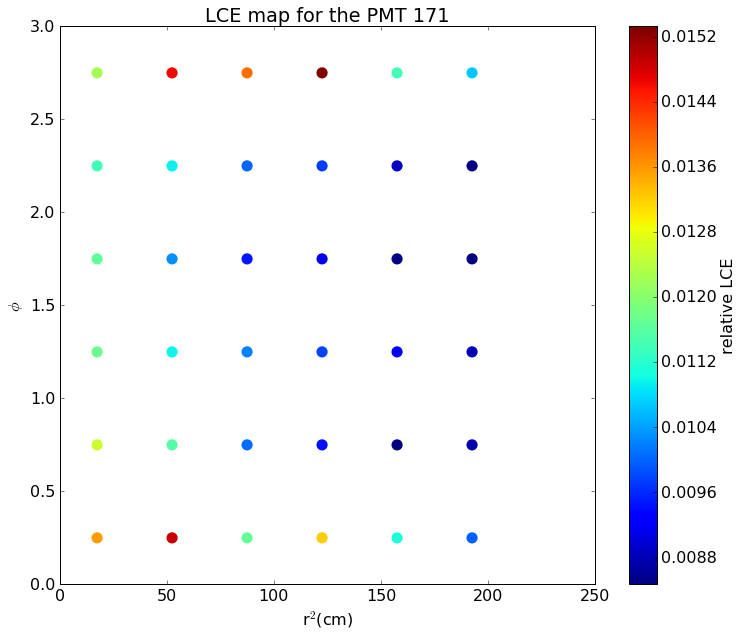

In [65]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_171']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result101=ri,zi,s1_mean_values

plt.scatter(result101[0],result101[1], c=result101[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 171')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_171']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi101=ri,phii,s1_mean_values

plt.scatter(resultphi101[0],resultphi101[1], c=resultphi101[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 171')
plt.show()

# PMT 172

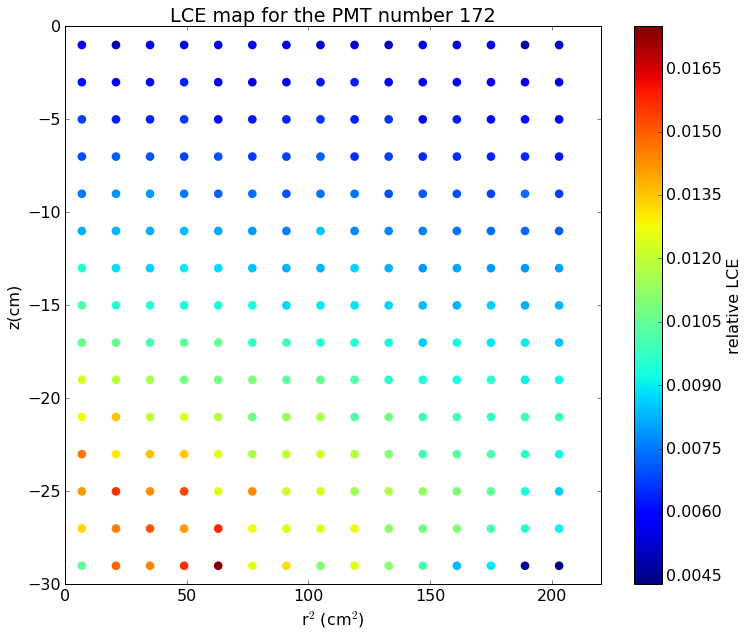

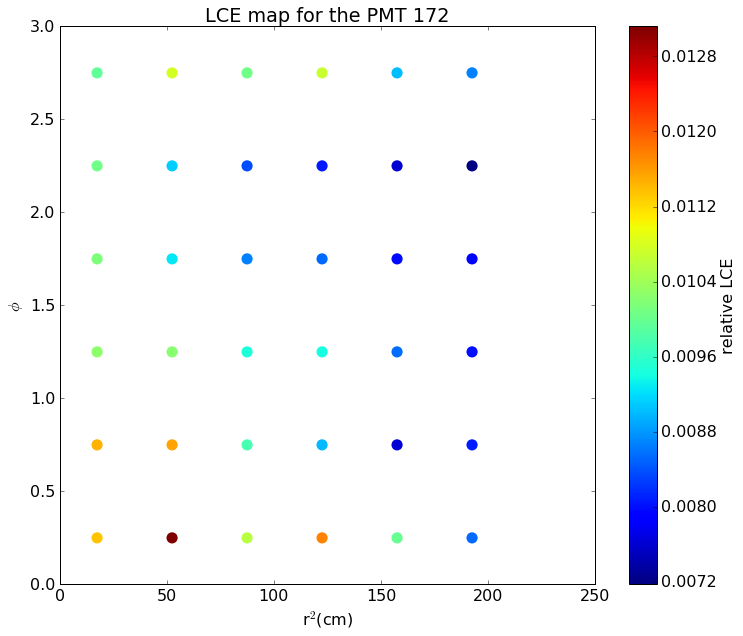

In [66]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_172']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result102=ri,zi,s1_mean_values

plt.scatter(result102[0],result102[1], c=result102[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 172')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_172']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi102=ri,phii,s1_mean_values

plt.scatter(resultphi102[0],resultphi102[1], c=resultphi102[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 172')
plt.show()

# PMT 173

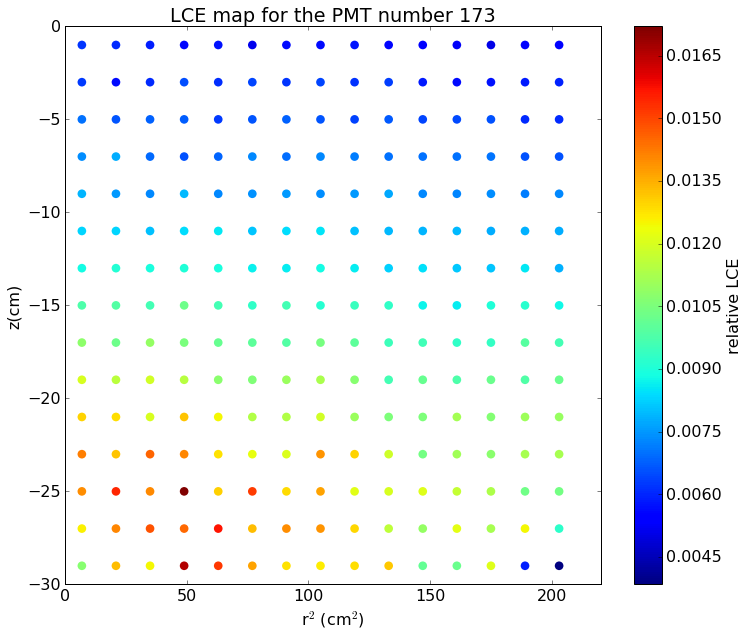

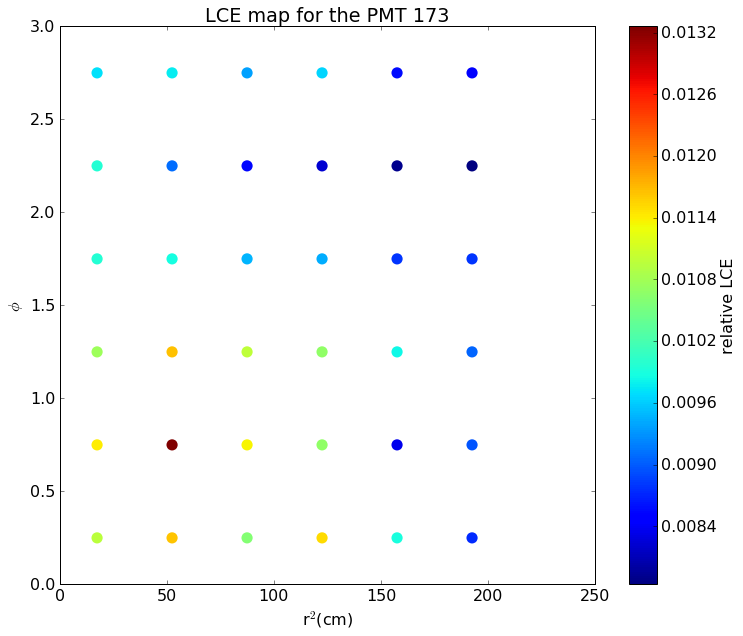

In [67]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_173']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result103=ri,zi,s1_mean_values

plt.scatter(result103[0],result103[1], c=result103[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 173')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_173']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi103=ri,phii,s1_mean_values

plt.scatter(resultphi103[0],resultphi103[1], c=resultphi103[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 173')
plt.show()

# PMT 174

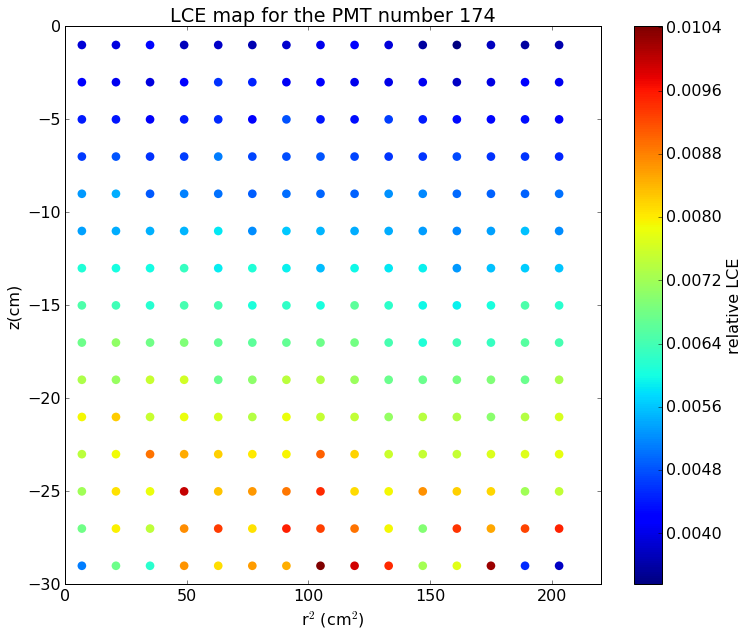

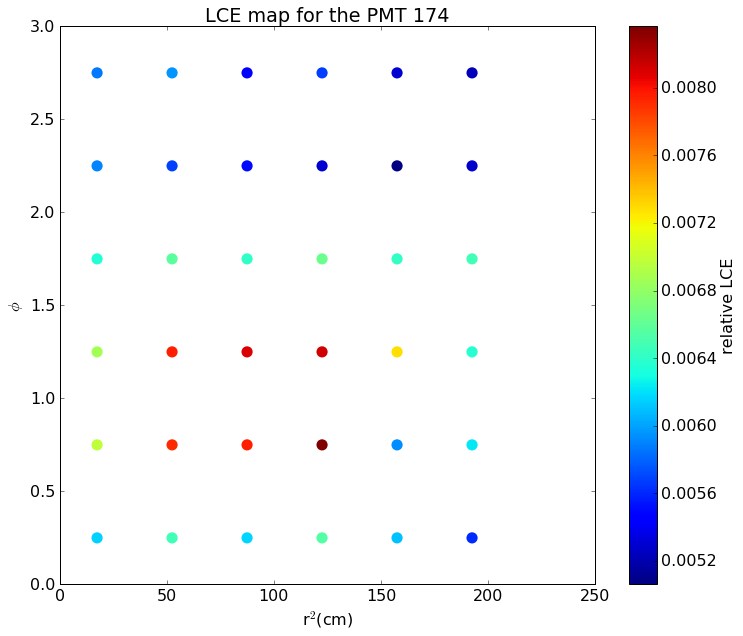

In [68]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_174']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result104=ri,zi,s1_mean_values

plt.scatter(result104[0],result104[1], c=result104[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 174')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_174']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi104=ri,phii,s1_mean_values

plt.scatter(resultphi104[0],resultphi104[1], c=resultphi104[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 174')
plt.show()

# PMT 175

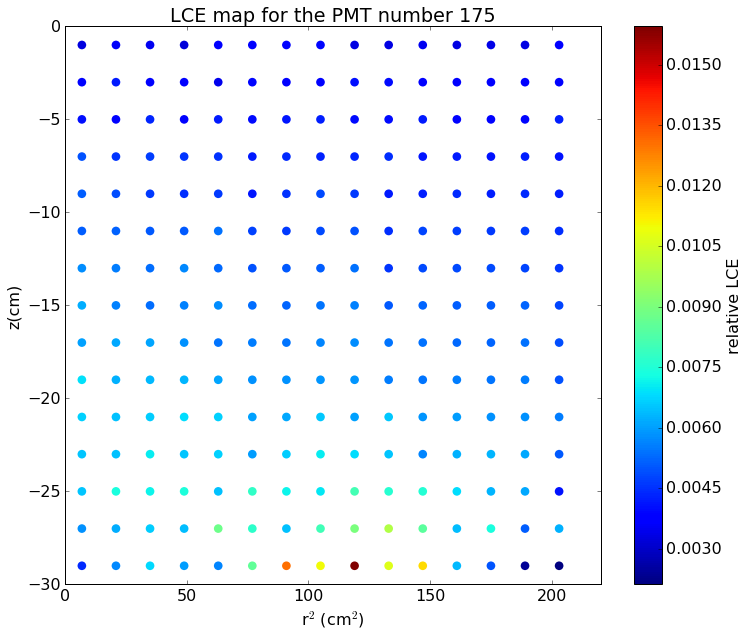

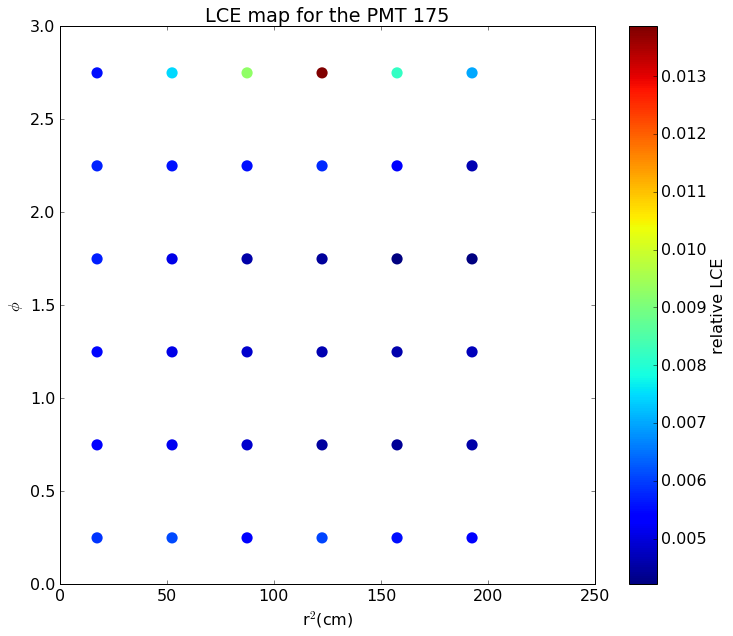

In [69]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_175']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result105=ri,zi,s1_mean_values

plt.scatter(result105[0],result105[1], c=result105[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 175')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_175']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi105=ri,phii,s1_mean_values

plt.scatter(resultphi105[0],resultphi105[1], c=resultphi105[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 175')
plt.show()

# PMT 176

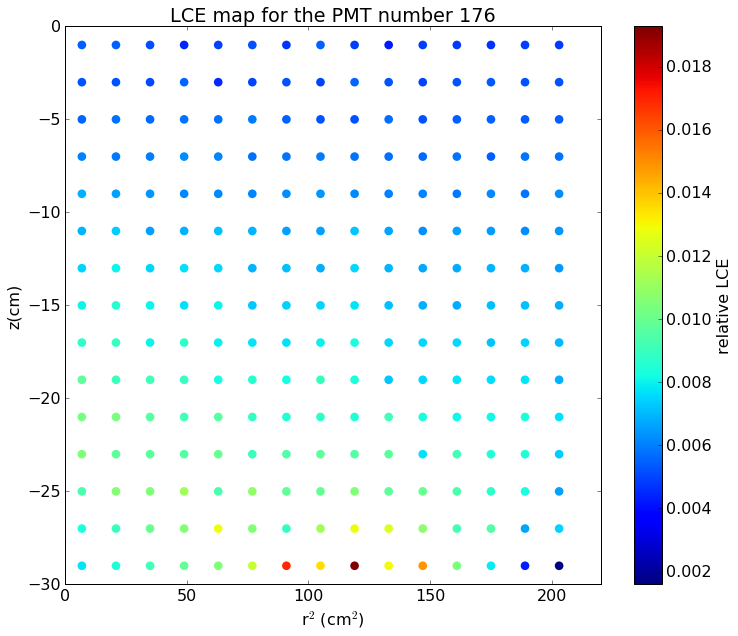

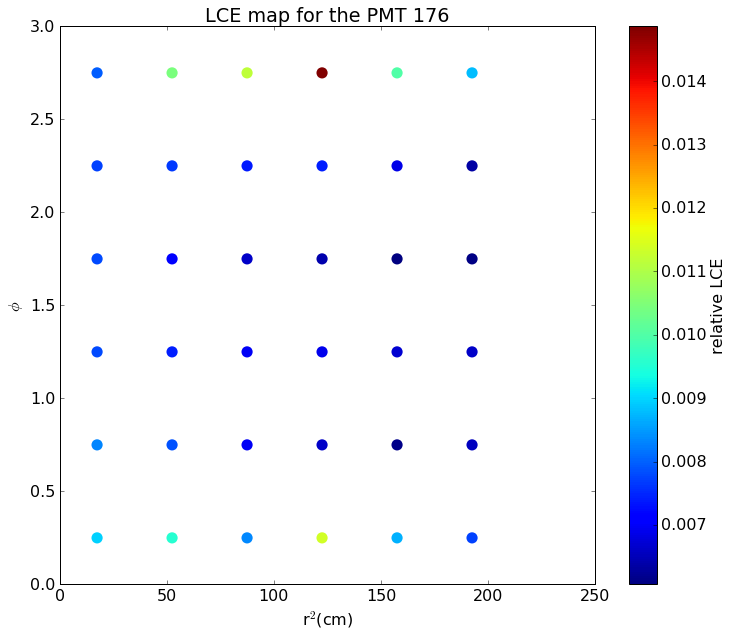

In [70]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_176']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result106=ri,zi,s1_mean_values

plt.scatter(result106[0],result106[1], c=result106[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 176')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_176']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi106=ri,phii,s1_mean_values

plt.scatter(resultphi106[0],resultphi106[1], c=resultphi106[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 176')
plt.show()

# PMT 177

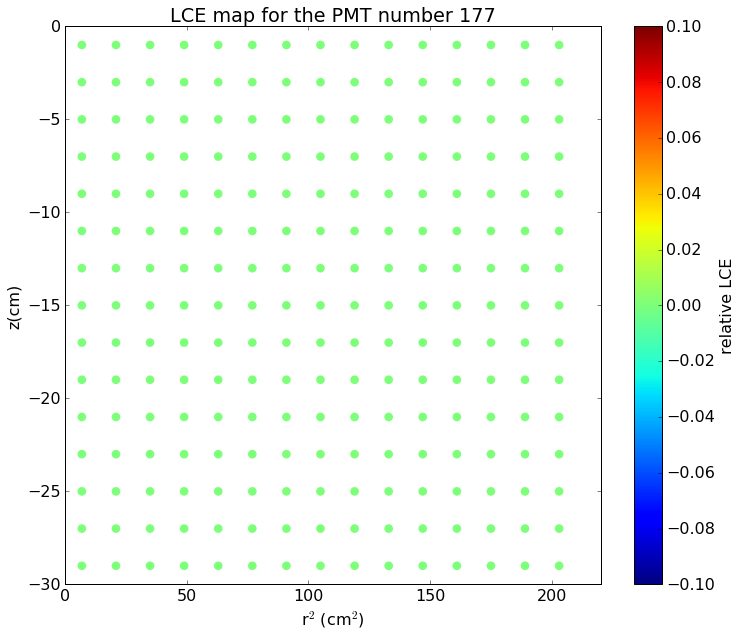

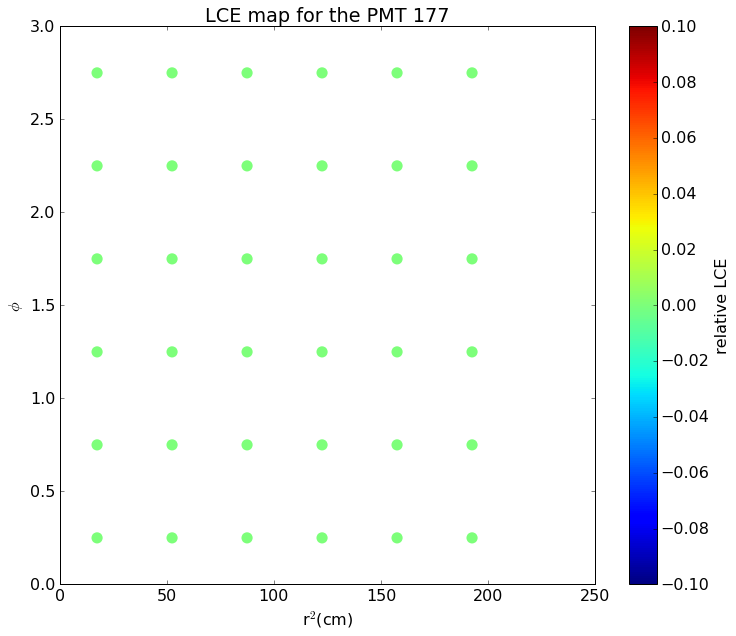

In [71]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_177']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result107=ri,zi,s1_mean_values

plt.scatter(result107[0],result107[1], c=result107[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 177')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_177']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi107=ri,phii,s1_mean_values

plt.scatter(resultphi107[0],resultphi107[1], c=resultphi107[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 177')
plt.show()

# PMT 178

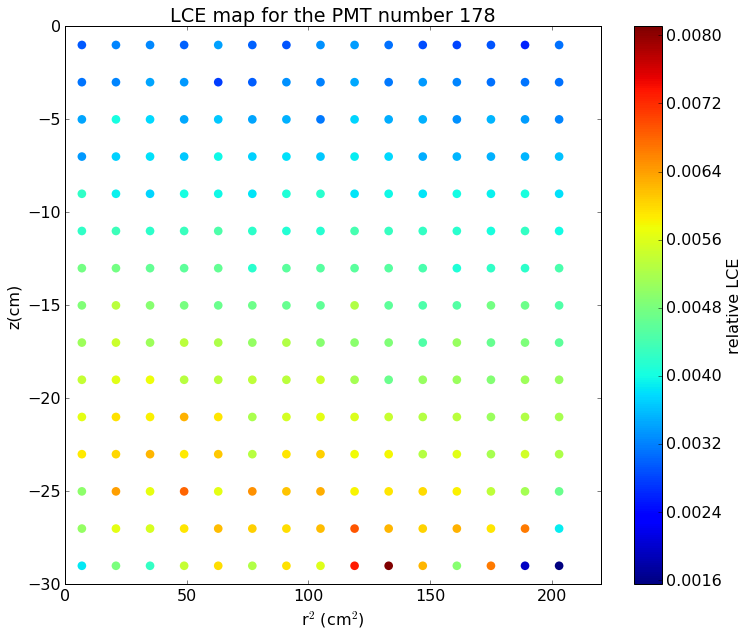

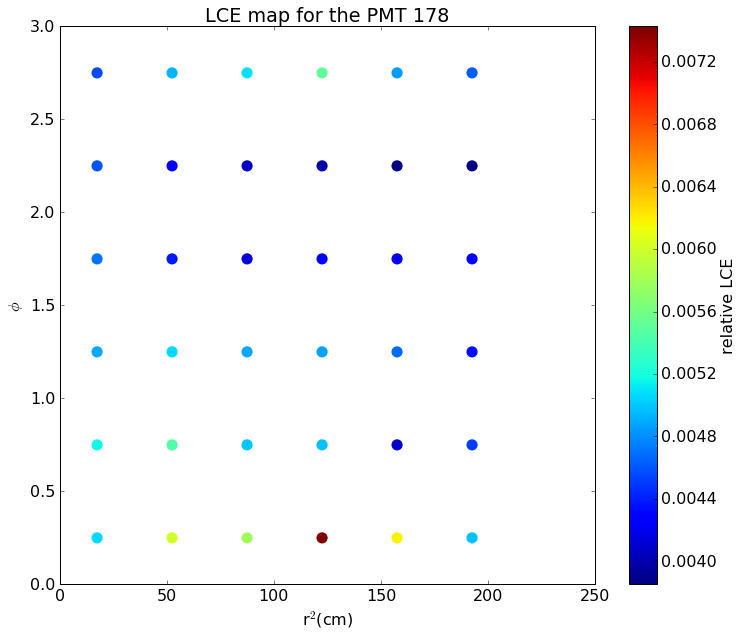

In [72]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_178']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result108=ri,zi,s1_mean_values

plt.scatter(result108[0],result108[1], c=result108[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 178')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_178']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi108=ri,phii,s1_mean_values

plt.scatter(resultphi108[0],resultphi108[1], c=resultphi108[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 178')
plt.show()

# PMT 179

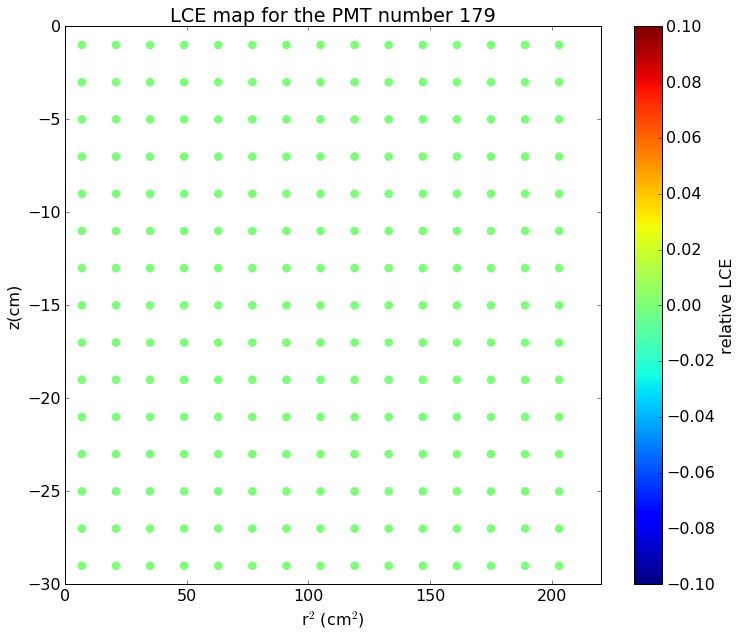

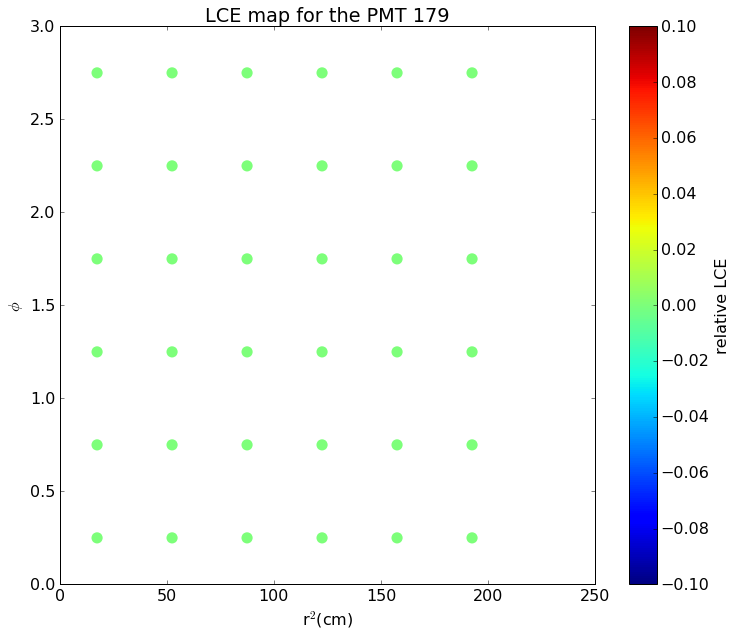

In [73]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_179']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result109=ri,zi,s1_mean_values

plt.scatter(result109[0],result109[1], c=result109[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 179')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_179']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi109=ri,phii,s1_mean_values

plt.scatter(resultphi109[0],resultphi109[1], c=resultphi109[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 179')
plt.show()

# PMT 180

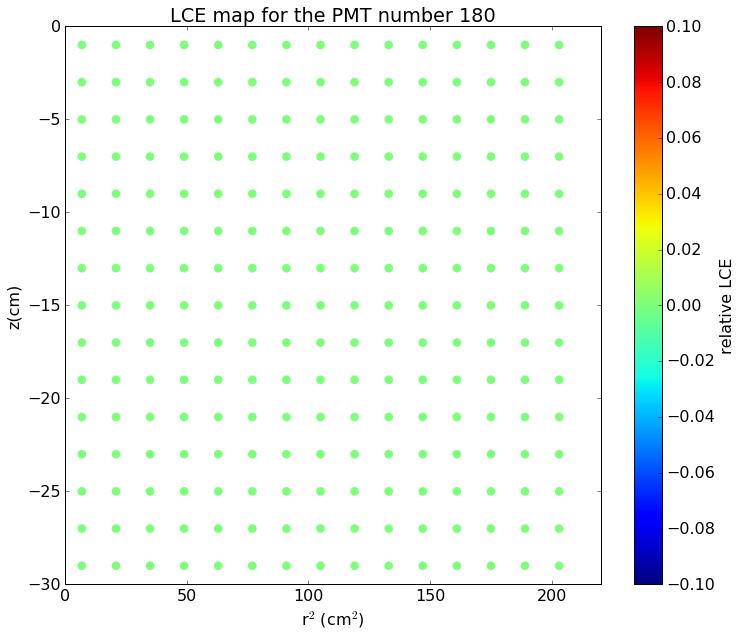

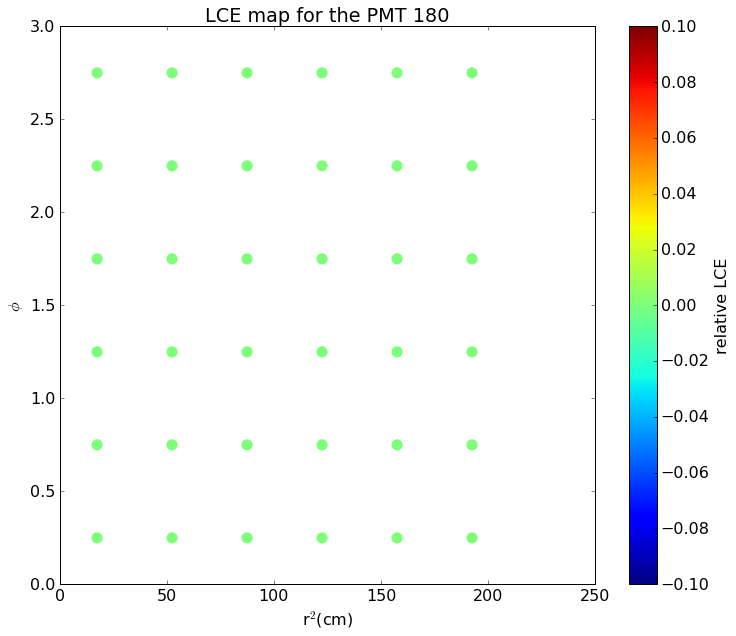

In [74]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_180']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result110=ri,zi,s1_mean_values

plt.scatter(result110[0],result110[1], c=result110[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 180')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_180']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi110=ri,phii,s1_mean_values

plt.scatter(resultphi110[0],resultphi110[1], c=resultphi110[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 180')
plt.show()

# PMT 181

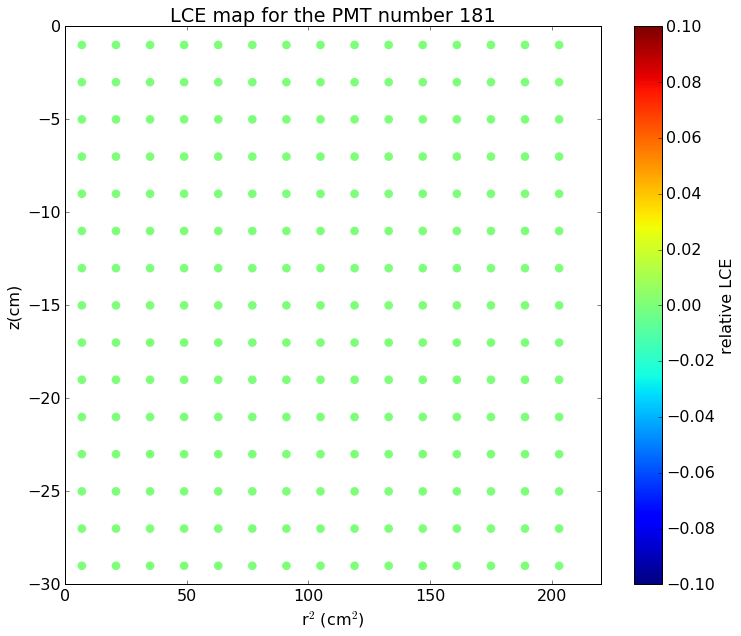

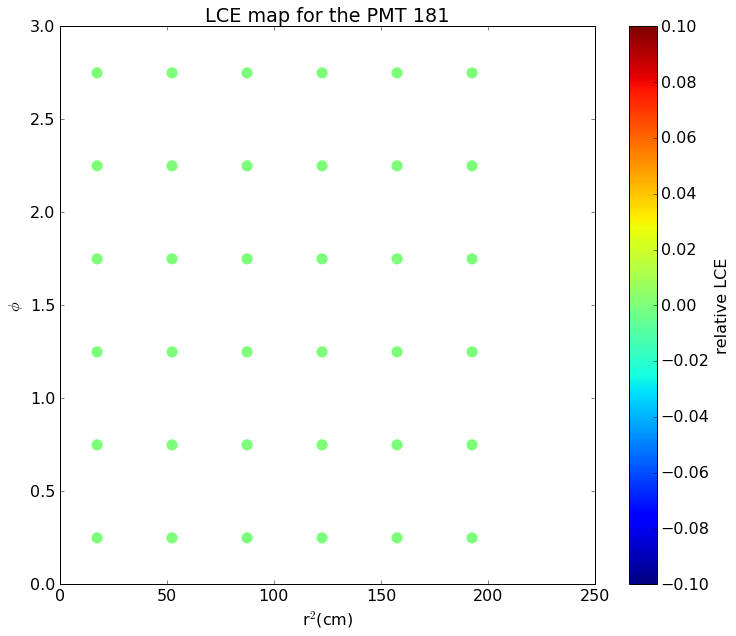

In [75]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_181']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result111=ri,zi,s1_mean_values

plt.scatter(result111[0],result111[1], c=result111[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 181')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_181']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi111=ri,phii,s1_mean_values

plt.scatter(resultphi111[0],resultphi111[1], c=resultphi111[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 181')
plt.show()

# PMT 182

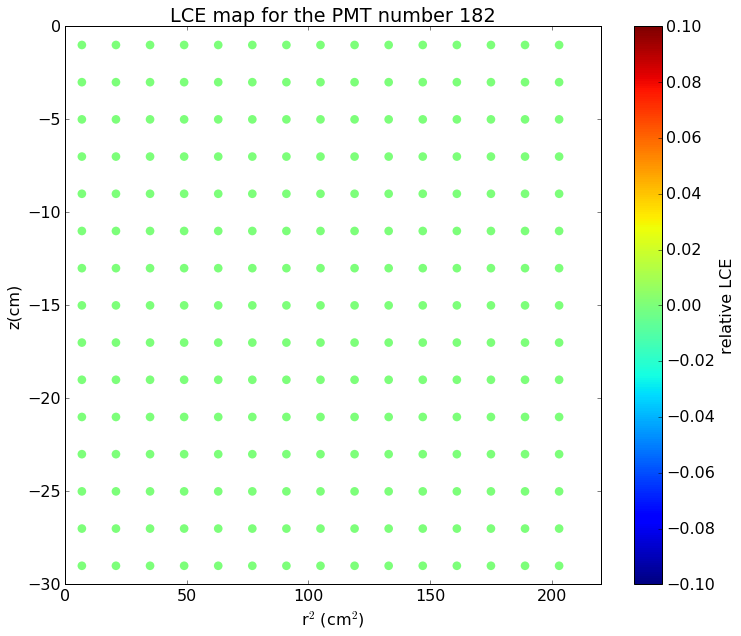

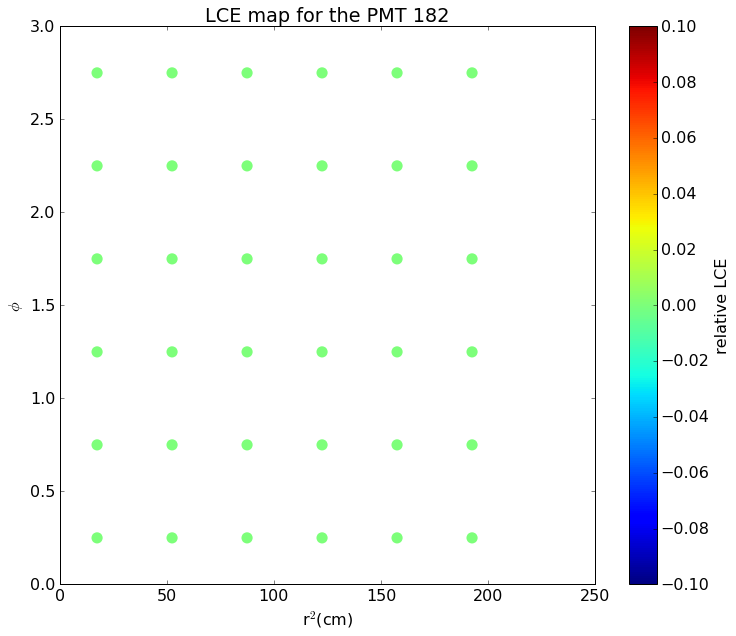

In [76]:
z_slices = np.arange(0,-32,-2)
r_slices=np.arange(0,220,14)
number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
zi=[]
for i, z in enumerate(z_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=((dataE2s['z']>z_slices[i+1]) & (dataE2s['z']<z_slices[i]) &
                  ((dataE2s['r']**2 )>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        
        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_182']/s1_mean_tpc)/len(dataE2s[box_cut])))
        
        ri.append((r_slices[j]+r_slices[j+1])/2)
        zi.append((z_slices[i]+z_slices[i+1])/2)
        
        
        if j ==(len(r_slices)-2):
            break
            
    if i == (len(z_slices)-2):
        break

s1_mean_values=np.array(s1_mean_values)
s1_mean_values=s1_mean_values.reshape(len(r_slices)-1,len(z_slices)-1)    

result112=ri,zi,s1_mean_values

plt.scatter(result112[0],result112[1], c=result112[2], edgecolor='none', s=300, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$ (cm$^2$)')
plt.ylabel('z(cm)')
plt.ylim(-30,0)
plt.xlim(0,220)
plt.title('LCE map for the PMT number 182')
plt.show()

phi_slices = np.arange(0,3.20,0.5)
r_slices=np.arange(0,220,35)
# phi_slices and r_slices must have the same length

number_list = []
s1_mean_values=[]
box_cut=[]
ri=[]
phii=[]


for i, phi in enumerate(phi_slices):

    for j, r in enumerate(r_slices):
        
        box_cut=(((dataE2s['phi']+np.pi/2)>phi_slices[i]) & ((dataE2s['phi']+np.pi/2)<phi_slices[i+1]) &
                  ((dataE2s['r']**2)>r_slices[j]) & ((dataE2s['r']**2)<r_slices[j+1])) 
        

        number_list.append(len(dataE2s[box_cut])) 
        
        s1_mean_values.append((np.sum(dataE2s[box_cut]['s1_area_channel_182']/s1_mean_tpc)/len(dataE2s[box_cut])))
    
        ri.append((r_slices[j]+r_slices[j+1])/2)
        phii.append((phi_slices[i]+phi_slices[i+1])/2)

            
        if j == (len(r_slices)-2):
            break
    if i ==(len(phi_slices)-2):
        break
        


s1_mean_values=np.array(s1_mean_values)

s1_mean_values=s1_mean_values.reshape(6,6)    
resultphi112=ri,phii,s1_mean_values

plt.scatter(resultphi112[0],resultphi112[1], c=resultphi112[2], edgecolor='none', s=500, marker='.')
plt.colorbar(label='relative LCE')
plt.xlabel('r$^2$(cm)')
plt.ylabel('$\phi$')
plt.title('LCE map for the PMT 182')
plt.show()

# From 179 to 242, s1_area_channel =0